# Data Science Repository Trends on GitHub: An Insightful EDA

### Project Break - EDA
Autor: Lucas Perez Barone

-------

### Justificación: 
La Ciencia de Datos es un área de conocimiento amplia, reciente y que está siendo constantemente revolucionada por la velocidad con la que se producen nuevas tecnologías y técnicas computacionales. En consecuencia, el Científico de Datos y las instituciones que se benefician de ella también deben estar en constante aprendizaje y transformación para mantenerse al día con el avance técnico.

### Objetivos: 
El presente proyecto tiene como objetivo principal observar la evolución del campo de la Ciencia de Datos y la emergencia de nuevas tendencias en el área, con el fin de generar insights a partir de estas.

### Objetivos específicos:
* Visión general sobre el aumento del número de técnicas y subáreas dentro de la Ciencia de Datos a lo largo de los años;
* Identificar cuáles de estas técnicas y subáreas han aumentado su relevancia en los últimos años y cuáles han perdido utilidad;
* Buscar temas específicos dentro de la Ciencia de Datos que estén relacionados con la mayor popularidad y el mayor nivel de compromiso en los repositorios;
* Generar insights sobre los resultados obtenidos.


Para cumplir con este objetivo, el proyecto utilizó **Análisis Exploratorio de Datos (EDA)** en datos de repositorios públicos obtenidos a través de la REST API de GitHub, filtrando únicamente los temas relacionados con *Data Science*. Para obtener más información sobre la recolección de datos, consulte el archivo *getting_GH_datasets.ipynb*.

El trabajo parte de la **premisa** de que GitHub es uno de los principales vehículos de difusión y compartición de *Data Science* en el mundo, y que la información contenida en sus repositorios puede ser un buen indicio de la evolución del área y la emergencia de nuevas tendencias.

------

### Índice.

1. Previsualización del DataFrame y datos;

2. Limpieza y preparación de los datos para análisis;

3. Análisis y visualización;

4. Análisis finales y conclusiones.

--------

## 1. Previsualización del DataFrame y datos

In [1]:
# Importación de bibliotecas estándar

from collections import Counter
from datetime import datetime, date
from itertools import combinations
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu, pearsonr
import os
import pandas as pd
import random
import requests
import seaborn as sns
import time

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Activación de un entorno virtual optimizado con aceleración por GPU.

import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(f"Dispositivo encontrado: {gpu}")

Dispositivo encontrado: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Importación de funciones auxiliares definidas por el usuario.

import sys
sys.path.append('./src/utils')  

from user_functions import *

In [4]:
# Cargando dataframe con todos los datos obtenidos a través de la API REST de GitHub desde 2010 hasta el 12 de diciembre de 2024.

df_2010_2024 = pd.read_json('./src/data/repositories_2010_to_2014.json')

In [5]:
# Mirando la pinta que tiene las columnas

df_2010_2024.sample(3)

id                                           name  \
29792  520523449                        SalaryPredictionProject   
37735  671268128  Bellabeat-Smart-Wellness-Device-Data-Analysis   
19974  368911193                           Open-Source-Projects   

                                               full_name  \
29792                   mz-zarei/SalaryPredictionProject   
37735  gordonkwokkwok/Bellabeat-Smart-Wellness-Device...   
19974                    amithganga/Open-Source-Projects   

                                                   owner  stargazers_count  \
29792  {'login': 'mz-zarei', 'id': 64227108, 'node_id...                 0   
37735  {'login': 'gordonkwokkwok', 'id': 112631794, '...                 1   
19974  {'login': 'amithganga', 'id': 57247833, 'node_...                 0   

       forks_count  watchers_count  open_issues_count  \
29792            0               0                  1   
37735            0               1                  0   
19974            0               0                  0   

                                                  topics  \
29792            [data-science, end-to-end, webscraping]   
37735  [data, data-analysis, data-science, data-struc...   
19974  [data-science, decision-trees, knn-classificat...   

                     created_at          language  has_issues  has_projects  \
29792 2022-08-02 14:06:27+00:00  Jupyter Notebook        True          True   
37735 2023-07-27 00:03:17+00:00  Jupyter Notebook        True          True   
19974 2021-05-19 15:11:04+00:00              None        True          True   

       has_downloads  has_discussions  has_wiki license  score  
29792           True            False      True    None      1  
37735           True            False      True    None      1  
19974           True            False      True    None      1

In [6]:
# Mirando dtype de cada columna y número de valores nulos

df_2010_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48774 entries, 0 to 48773
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 48774 non-null  int64              
 1   name               48774 non-null  object             
 2   full_name          48774 non-null  object             
 3   owner              48774 non-null  object             
 4   stargazers_count   48774 non-null  int64              
 5   forks_count        48774 non-null  int64              
 6   watchers_count     48774 non-null  int64              
 7   open_issues_count  48774 non-null  int64              
 8   topics             48774 non-null  object             
 9   created_at         48774 non-null  datetime64[ns, UTC]
 10  language           43891 non-null  object             
 11  has_issues         48774 non-null  bool               
 12  has_projects       48774 non-null  bool       

In [7]:
# Observando la incidencia de valores nulos.

df_2010_2024.isnull().sum()

id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

A pesar de la presencia de valores nulos en algunas variables, el dataframe parece tener el tipo de dato (dtype) adecuado para cada una de ellas.

### Resumen del dataframe.

| **Columna**            | **Descripción**                                                                                                  | **dtype** |
|------------------------|------------------------------------------------------------------------------------------------------------------|-----------|
| `id`                   | El identificador único del repositorio.                                                                          |     int64      |
| `name`                 | El nombre del repositorio.                                                                                       |   object (str) |
| `full_name`            | El nombre completo del repositorio, incluyendo el nombre del propietario.                                        |   object (str) |
| `owner`                | Un objeto que contiene información sobre el propietario del repositorio                                          |object (dict)   |
| `stargazers_count`     | El número de estrellas (stars) que el repositorio ha recibido.                                                   |     int64      |
| `forks_count`          | El número de forks (copias) realizadas a partir del repositorio.                                                 |     int64      |
| `watchers_count`       | El número de observadores que están siguiendo las actividades del repositorio.                                   |     int64      |
| `open_issues_count`    | El número de problemas (issues) abiertos en el repositorio.                                                      |    int64       |
| `topics`               | Una lista de temas y palabras clave asociados al repositorio.                                                    |  object (list) |
| `created_at`           | La fecha y hora en que el repositorio fue creado.                                                                | datetime64[ns, UTC]|
| `language`             | El principal lenguaje de programación utilizado en el repositorio.                                               |    object(str)   |
| `has_issues`           | Valor que indica si el repositorio tiene issues (problemas) habilitados.                                         |        bool   |
| `has_projects`         | Valor que indica si el repositorio tiene proyectos habilitados.                                                  |      bool     |
| `has_downloads`        | Valor que indica si el repositorio permite la descarga de archivos.                                              |       bool    |
| `has_discussions`      | Valor que indica si el repositorio tiene discusiones habilitadas.                                                |      bool     |
| `has_wiki`             | Valor que indica si el repositorio tiene una wiki habilitada.                                                    |      bool     |
| `license`              | El tipo de licencia bajo la cual el repositorio está disponible.                                                 |      object (dict)  |
| `score`                | Un valor numérico (0-1) que representa la relevancia de un repositorio en los resultados de una búsqueda.         |     int64    |

In [8]:
# # Observando el aspecto de las variables numéricas int64


df_2010_2024.describe(percentiles=[.25, .50, .75, .95])

id  stargazers_count   forks_count  watchers_count  \
count  4.877400e+04      48774.000000  48774.000000    48774.000000   
mean   4.510644e+08         60.855538     13.664657       60.855538   
std    2.330401e+08        973.279404    253.366183      973.279404   
min    6.585180e+05          0.000000      0.000000        0.000000   
25%    2.565963e+08          0.000000      0.000000        0.000000   
50%    4.373096e+08          0.000000      0.000000        0.000000   
75%    6.418589e+08          2.000000      1.000000        2.000000   
95%    8.394508e+08         39.000000     14.000000       39.000000   
max    9.025653e+08      70101.000000  25460.000000    70101.000000   

       open_issues_count    score  
count       48774.000000  48774.0  
mean            2.668881      1.0  
std            47.476363      0.0  
min             0.000000      1.0  
25%             0.000000      1.0  
50%             0.000000      1.0  
75%             0.000000      1.0  
95%             4.000000      1.0  
max          4260.000000      1.0

Observaciones:

* La distribución de los valores numéricos (con excepción del Score) es **extremadamente asimétrica**, teniendo valores máximos que superan el percentil 95% en más de mil veces.
* La variable Score, a pesar de ser de tipo int64, parece ser booleana (0-1). Investigaré la posibilidad de transformarla en True y False.

In [9]:
df_2010_2024["score"].value_counts()

score
1    48774
Name: count, dtype: int64

El score refleja la relevancia de un repositorio para una búsqueda/consulta específica. En mi conjunto de datos, todos los valores de score son iguales a uno, de manera que no serán útiles para análisis posteriores y probablemente son un requisito impuesto por el filtro de la API al momento de obtener los resultados, recolectando solo datos con relevancia de score = 1.

----------------------------

## 2. Limpieza y preparación de los datos para análisis;

### 2.1. Tratamiento de valores nulos.

In [10]:
# Creando cópia de df_2010_2024 para limpieza

df_clean = df_2010_2024.copy()

In [11]:
df_clean.isnull().sum()


id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

In [12]:
# Observando la columna 'license'

df_clean["license"].sample(3)

8456     None
11610    None
31332    None
Name: license, dtype: object

Considerando que la variable `license` tiene más del 60% de valores nulos que no permiten imputación y parecen no ofrecer información crucial para los análisis objetivos de este proyecto, se eliminará directamente.

In [13]:
df_clean = df_clean.drop(["license"], axis=1)
df_clean.isnull().sum()

id                      0
name                    0
full_name               0
owner                   0
stargazers_count        0
forks_count             0
watchers_count          0
open_issues_count       0
topics                  0
created_at              0
language             4883
has_issues              0
has_projects            0
has_downloads           0
has_discussions         0
has_wiki                0
score                   0
dtype: int64

In [14]:
# Observando la variable 'language'

print("La columna 'language' tiene", round(df_clean["language"].isnull().sum()/len(df_clean)*100,2),"% de valores nulos")

La columna 'language' tiene 10.01 % de valores nulos


In [15]:
df_clean.language.value_counts().head(5)

language
Jupyter Notebook    26728
Python               8704
HTML                 2878
R                    1952
JavaScript            734
Name: count, dtype: int64

A pesar del 10% de valores nulos, en un primer momento optaré por no realizar ningún tipo de imputación y mantener la columna tal como está, ya que la cantidad de valores no nulos es alta y ya permitiría realizar muchos análisis solo excluyendo ese 10% en los cálculos, y eliminar todas esas filas reduciría el valor muestral para otros análisis que no dependen de la columna `language`

In [16]:
# Observando la columna `topics`, una de las más importantes para análisis posteriores.

df_clean.topics.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48774 entries, 0 to 48773
Series name: topics
Non-Null Count  Dtype 
--------------  ----- 
48774 non-null  object
dtypes: object(1)
memory usage: 381.2+ KB


Aunque no se contabilicen los nulos para la columna 'topics', un análisis más detallado mostró que contenía algunos resultados como listas vacías [ ], que pueden interpretarse como un tipo de nulo. 

In [17]:
print("Número de datos com listas vacías:", df_clean["topics"].apply(lambda x: x == []).sum())

Número de datos com listas vacías: 47


In [18]:
df_clean.loc[df_clean["topics"].apply(lambda x: x == [])].sample(3)

id                                       name  \
41694  750824445                                  Harmon-AI   
41641  740631372  unsupervised-learning-interview-questions   
41660  744219457                   Apple_Quality_Classifier   

                                               full_name  \
41694                               Uriiol1808/Harmon-AI   
41641  Devinterview-io/unsupervised-learning-intervie...   
41660                  faris771/Apple_Quality_Classifier   

                                                   owner  stargazers_count  \
41694  {'login': 'Uriiol1808', 'id': 83230463, 'node_...                 4   
41641  {'login': 'Devinterview-io', 'id': 76989322, '...                 8   
41660  {'login': 'faris771', 'id': 70337488, 'node_id...                 6   

       forks_count  watchers_count  open_issues_count topics  \
41694            2               4                  0     []   
41641            3               8                  0     []   
41660            2               6                  0     []   

                     created_at          language  has_issues  has_projects  \
41694 2024-01-31 11:50:53+00:00  Jupyter Notebook        True          True   
41641 2024-01-08 18:34:06+00:00              None        True          True   
41660 2024-01-16 21:17:09+00:00  Jupyter Notebook        True          True   

       has_downloads  has_discussions  has_wiki  score  
41694           True            False     False      1  
41641           True            False      True      1  
41660           True            False      True      1

Se verificó manualmente en la página web de GitHub y se constató que esos repositorios tienen temas que no fueron correctamente adquiridos.

La cantidad de datos es muy pequeña y no debería impactar tanto en los análisis, pudiendo ser descartados. Sin embargo, se observó que la distribución de estos datos ocurre principalmente en 2024, uno de los años clave para los análisis. 

De esta manera, se decidió hacer la **imputación manual** de esos valores accediendo a los repositorios en GitHub Web a través de sus nombres completos.

In [19]:
empty_topics = df_clean[df_clean['topics'].apply(lambda x: x == [])]

print(empty_topics[['id','full_name']].sample(5))

              id                                          full_name
41615  740929773    Mindinventory/Bank-Marketing-Data-Visualisation
41627  749425870  yashksaini-coder/Lead-Case-Study-Capstone-Project
41693  747526318           AICLUB-IIITDM/data-science-bootcamp-2024
41610  744634700   questdb/time-series-streaming-analytics-template
41673  746881096             MIT-Emerging-Talent/2024-group-06-cdsp


In [20]:
# Importando archivo .py con los datos a ser reemplazados

from manual_reemplacement import manual_dic

In [21]:
# Reemplazando valores

df_clean["topics"] = df_clean.apply(
    lambda row: manual_dic.get(row["id"], row["topics"]) if row["topics"] == [] else row["topics"],
    axis=1
)

In [22]:
# Confirmando si aún hay filas con listas vacías [ ]

print("Número de datos com listas vacías:", df_clean["topics"].apply(lambda x: x == []).sum())

Número de datos com listas vacías: 0


### 2.2. Tratamiento de valores duplicados

In [23]:
# Creando df prueba para tratar duplicados

df_check_duplicate = df_clean.copy()

In [24]:
# Las columnas 'owner' y 'topics' deben ser desconsideradas en la aplicación de .duplicated() porque son de tipo 'unhashable'.

columns = [col for col in df_check_duplicate.columns if col not in ['owner', 'topics']]
duplicates = df_check_duplicate[df_check_duplicate.duplicated(subset=columns, keep=False)]

print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 2912


In [25]:
duplicates.head(6)

id     name              full_name  \
6   1555094   shogun  shogun-toolbox/shogun   
7   1555094   shogun  shogun-toolbox/shogun   
17  3329386   fedmsg    fedora-infra/fedmsg   
19  3329386   fedmsg    fedora-infra/fedmsg   
41  9139182  pydepta        pydepta/pydepta   
44  9139182  pydepta        pydepta/pydepta   

                                                owner  stargazers_count  \
6   {'login': 'shogun-toolbox', 'id': 690673, 'nod...              3032   
7   {'login': 'shogun-toolbox', 'id': 690673, 'nod...              3032   
17  {'login': 'fedora-infra', 'id': 3316637, 'node...               170   
19  {'login': 'fedora-infra', 'id': 3316637, 'node...               170   
41  {'login': 'pydepta', 'id': 91364402, 'node_id'...                83   
44  {'login': 'pydepta', 'id': 91364402, 'node_id'...                83   

    forks_count  watchers_count  open_issues_count  \
6          1037            3032                427   
7          1037            3032                427   
17           93             170                 47   
19           93             170                 47   
41           28              83                  3   
44           28              83                  3   

                                               topics  \
6   [artificial-intelligence, c-plus-plus, cmake, ...   
7   [artificial-intelligence, c-plus-plus, cmake, ...   
17  [data-science, fedora-project, message-bus, py...   
19  [data-science, fedora-project, message-bus, py...   
41                                     [data-science]   
44                                     [data-science]   

                  created_at language  has_issues  has_projects  \
6  2011-04-01 10:44:32+00:00      C++        True          True   
7  2011-04-01 10:44:32+00:00      C++        True          True   
17 2012-02-01 21:50:18+00:00   Python        True          True   
19 2012-02-01 21:50:18+00:00   Python        True          True   
41 2013-04-01 01:51:56+00:00        C        True          True   
44 2013-04-01 01:51:56+00:00        C        True          True   

    has_downloads  has_discussions  has_wiki  score  
6            True             True      True      1  
7            True             True      True      1  
17           True            False     False      1  
19           True            False     False      1  
41           True            False      True      1  
44           True            False      True      1

In [26]:
# Eliminando duplicados

df_check_duplicate = df_check_duplicate.drop_duplicates(subset=columns, keep='first')

columns = [col for col in df_check_duplicate.columns if col not in ['owner', 'topics']]
duplicates = df_check_duplicate[df_check_duplicate.duplicated(subset=columns, keep=False)]

print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 0


In [27]:
df_check_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47318 entries, 0 to 48773
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 47318 non-null  int64              
 1   name               47318 non-null  object             
 2   full_name          47318 non-null  object             
 3   owner              47318 non-null  object             
 4   stargazers_count   47318 non-null  int64              
 5   forks_count        47318 non-null  int64              
 6   watchers_count     47318 non-null  int64              
 7   open_issues_count  47318 non-null  int64              
 8   topics             47318 non-null  object             
 9   created_at         47318 non-null  datetime64[ns, UTC]
 10  language           42596 non-null  object             
 11  has_issues         47318 non-null  bool               
 12  has_projects       47318 non-null  bool            

`df_check_duplicate` ya tiene los drops necesarios de columnas y filas, y los valores de 'topics' imputados. Ahora se generarán dos dataframes distintos: `df` y `df_language`. La columna 'language' será eliminada de df, eliminando así la última variable con valores nulos. En df_language se eliminarán las filas nulas y se usará exclusivamente para realizar análisis derivados de la variable 'language'

In [28]:
df = df_check_duplicate.copy().drop(["language"], axis=1)
df_language = df_check_duplicate.copy().dropna()

### Resumen de los dataframes

|   DataFrame         |    Descripción                                                                |
| --------------      |   -----------------                                                           |
|  `df_2010_2024`       |   df que incluye todos los datos de 2010 a 2024 sin tratamiento              |
|  `df_clean`           |   df con imputación manual de valores faltantes en la columna 'topics'       |
|  `df_check_duplicate` |   df con eliminación de valores duplicados                                   |
|  `df`                 |   df preparado para análisis, sin nulos ni duplicados                        |
|  `df_language`        |   df preparado para análisis que utilizen el procesamiento de la variable 'language' |

--------------

## 3. Análisis y visualización

### 3.1. Panorama

In [29]:
# Creando una nueva columna 'year' con valores de años como enteros, para facilitar  cálculos y agrupaciones

df['year'] = df["created_at"].dt.year
df_language['year'] = df_language["created_at"].dt.year

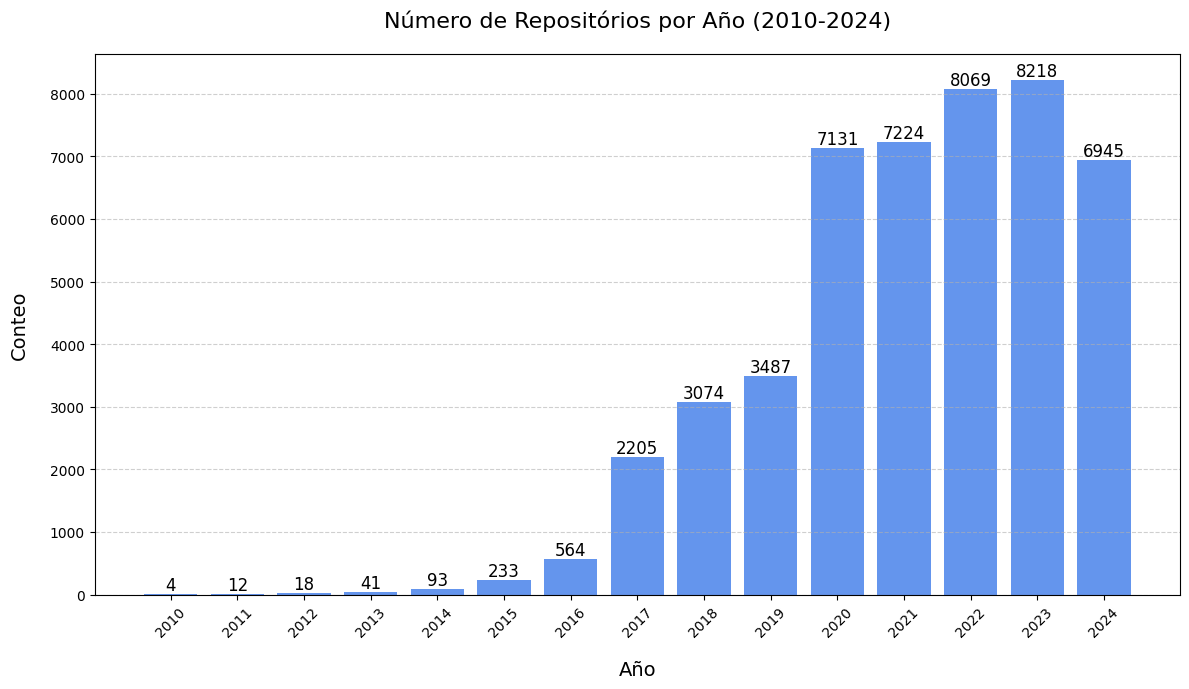

In [30]:
# Número de repositórios encontrados por año

plot_data_by_year(df, "created_at")

La progresión parece ser exponencial o superlineal, con saltos significativos entre 2016-2017 y 2019-2020

Es posible observar la evolución aceleradísima del campo de la Ciencia de Datos, con su primera aparición como tema en GitHub en 2010 y alcanzando más de 47 mil repositorios públicos totales después de 14 años.

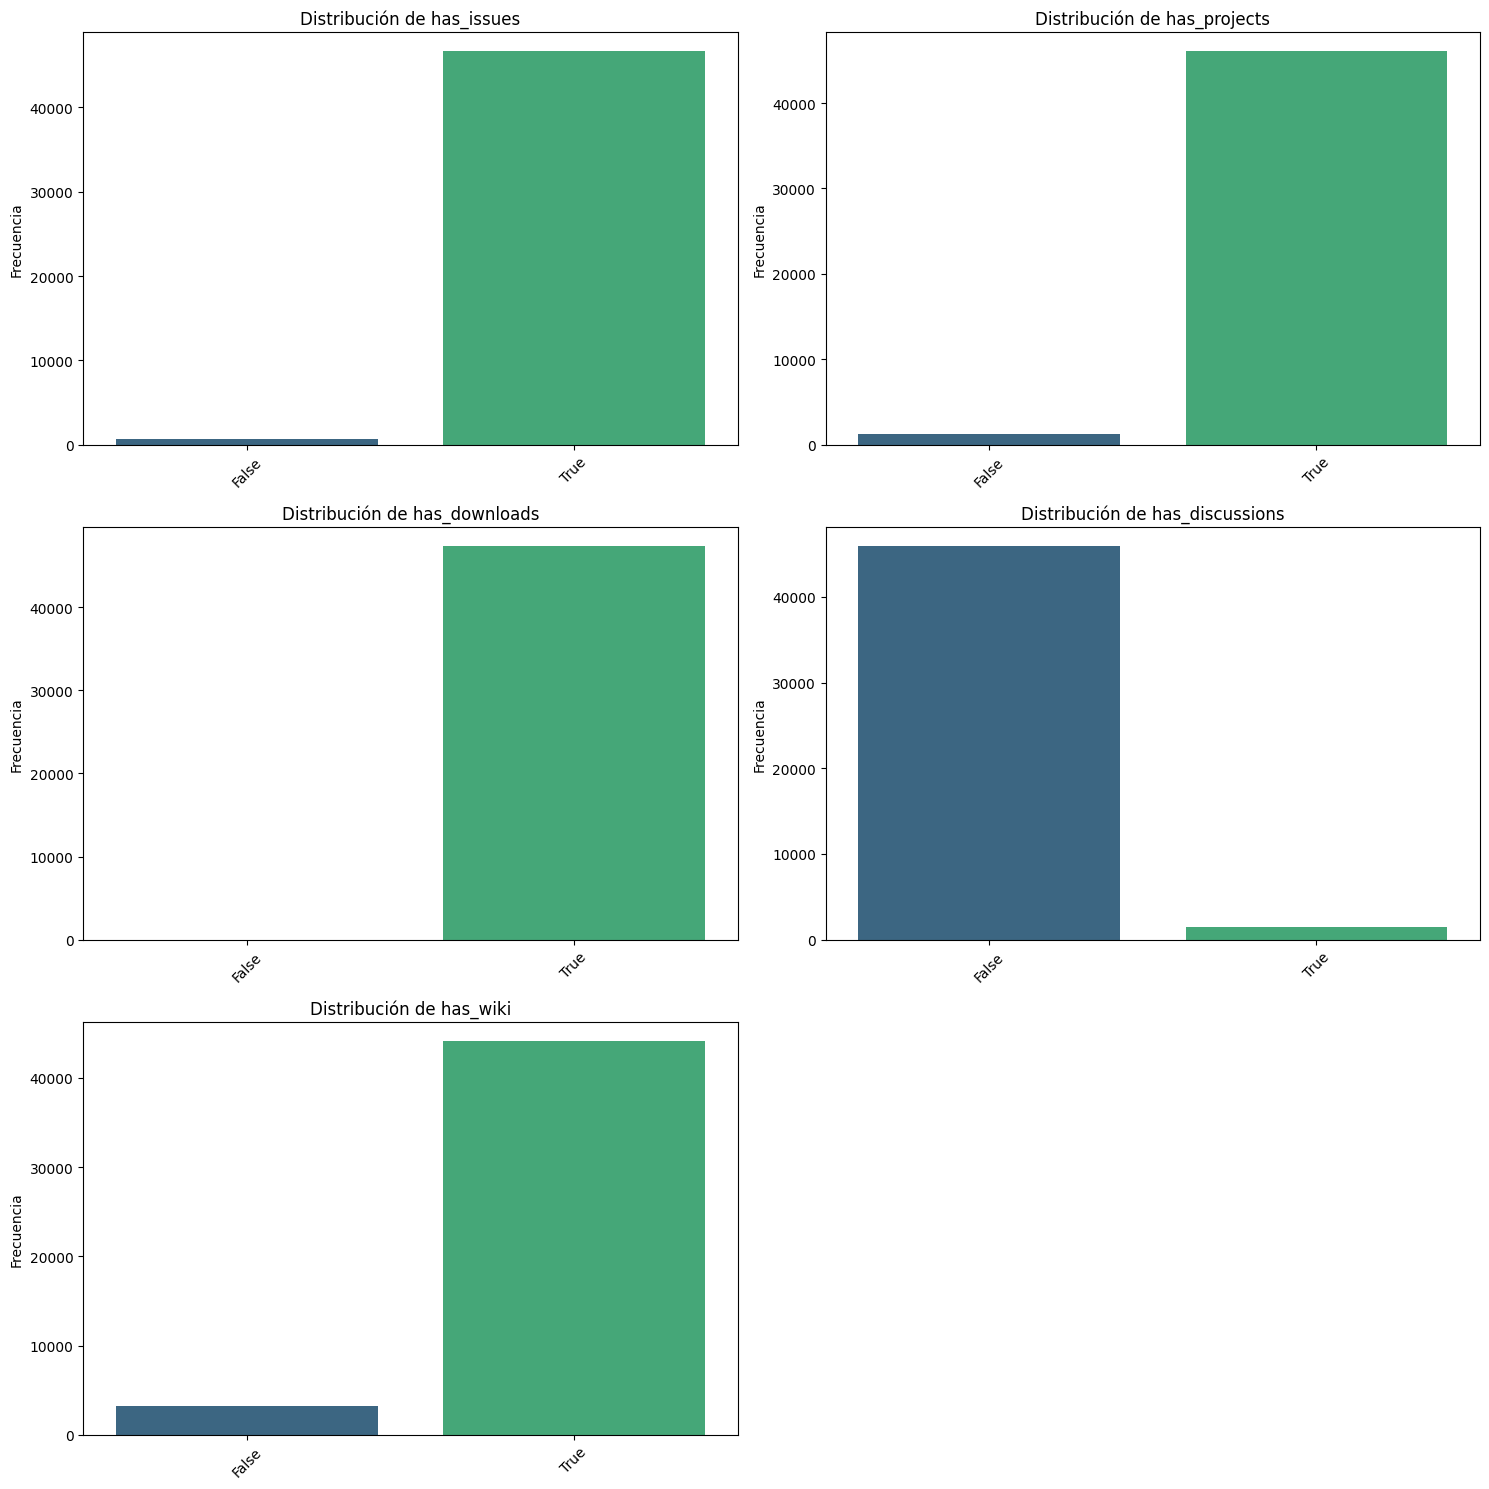

In [31]:
# Distribución de las columnas categóricas booleanas

cat_columns = ["has_issues", "has_projects", "has_downloads", "has_discussions", "has_wiki"]

categorical_distribution_aspect(df, cat_columns)

### 3.2. Lenguajes de programación más utilizados

La columna *language* solo permite una cadena de texto. De esta forma, interpretaremos su valor como el lenguaje de programación predominante en el repositorio, sin descartar el uso de otros lenguajes.

In [32]:
print("Los 5 lenguajes de programación más utilizados:\n")
print(df_language.language.value_counts().head(5))

Los 5 lenguajes de programación más utilizados:

language
Jupyter Notebook    25961
Python               8438
HTML                 2792
R                    1900
JavaScript            705
Name: count, dtype: int64


La función `plot_occurrences_by_year` muestra un gráfico de barras con el número de repositorios identificados con cada lenguaje de programación por año, tanto en valores absolutos como en porcentajes (normalizados en proporción al total de repositorios del año).

```python3
plot_occurrences_by_year(df, column_name, search_string, year_range=None)
```

La función acepta como argumentos un dataframe de pandas, el nombre de una columna, una cadena a ser buscada y un rango de años (que retorna todo el intervalo de años en caso de no especificarse).

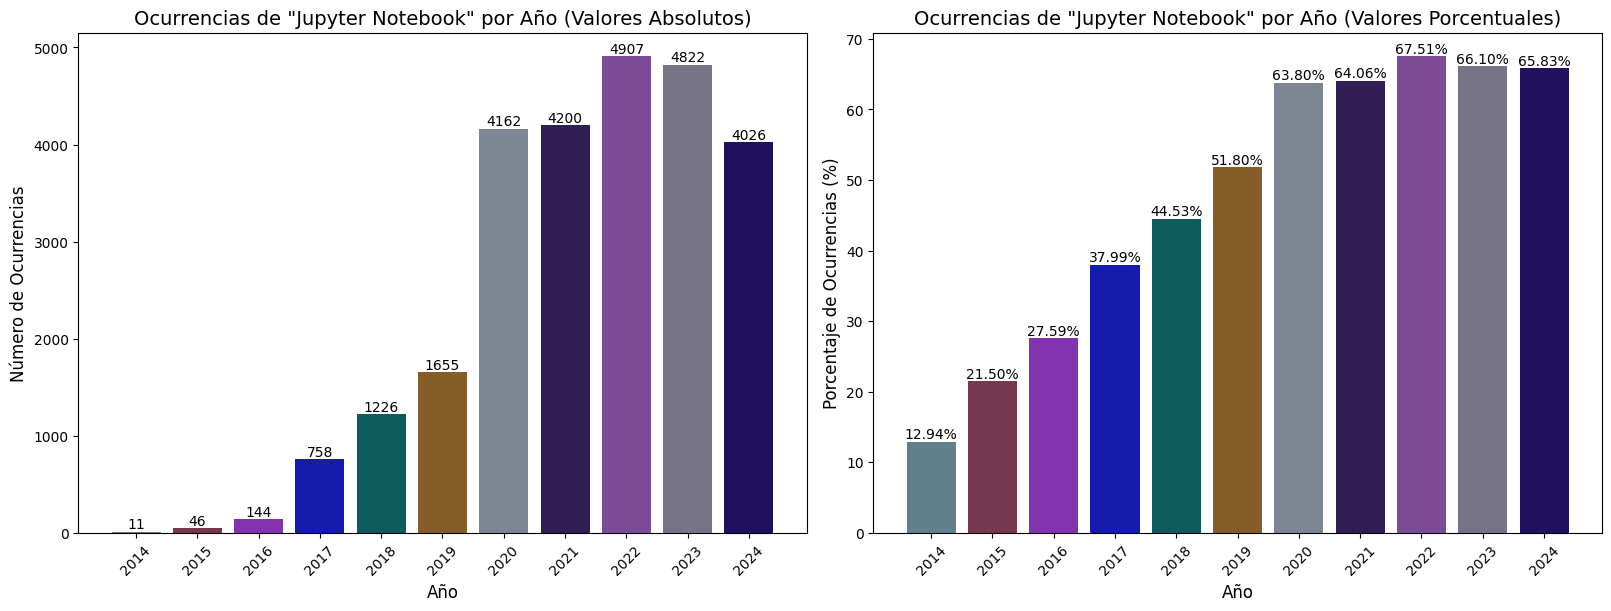

In [37]:
plot_occurrences_by_year(df_language, "language", "Jupyter Notebook", year_range=range(2014,2025))

Jupyter Notebook es una **herramienta** que permite el uso de diversos lenguajes de programación, **pero no es un lenguaje** en sí mismo. Su versatilidad en el contexto de la ciencia de datos, que requiere la integración de diferentes lenguajes y técnicas, probablemente es la razón que impulsa su crecimiento en los últimos años, tanto en valores absolutos como proporcionales.

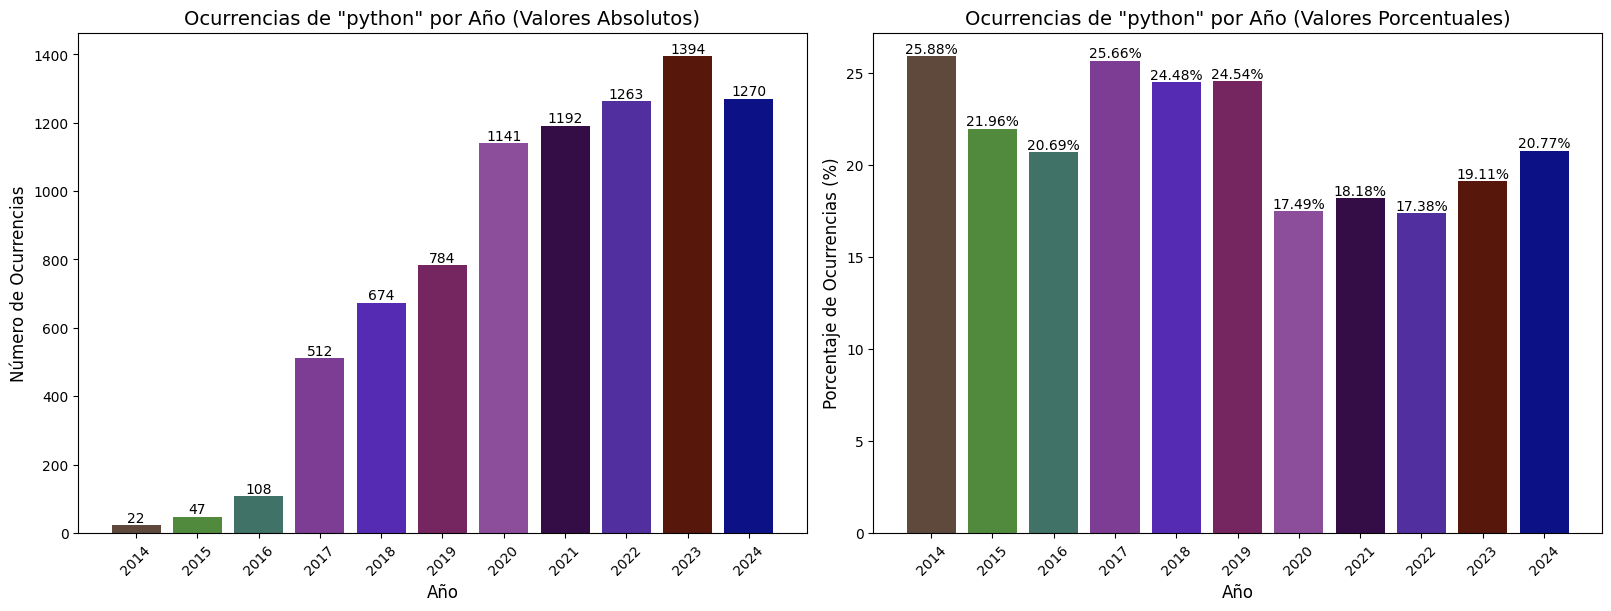

In [41]:
plot_occurrences_by_year(df_language, "language", "python", year_range=range(2014,2025))

Aunque Python esté creciendo en valores absolutos, su impacto proporcional parece ser constante y consistente, sin mostrar ninguna tendencia clara de aumento o disminución.

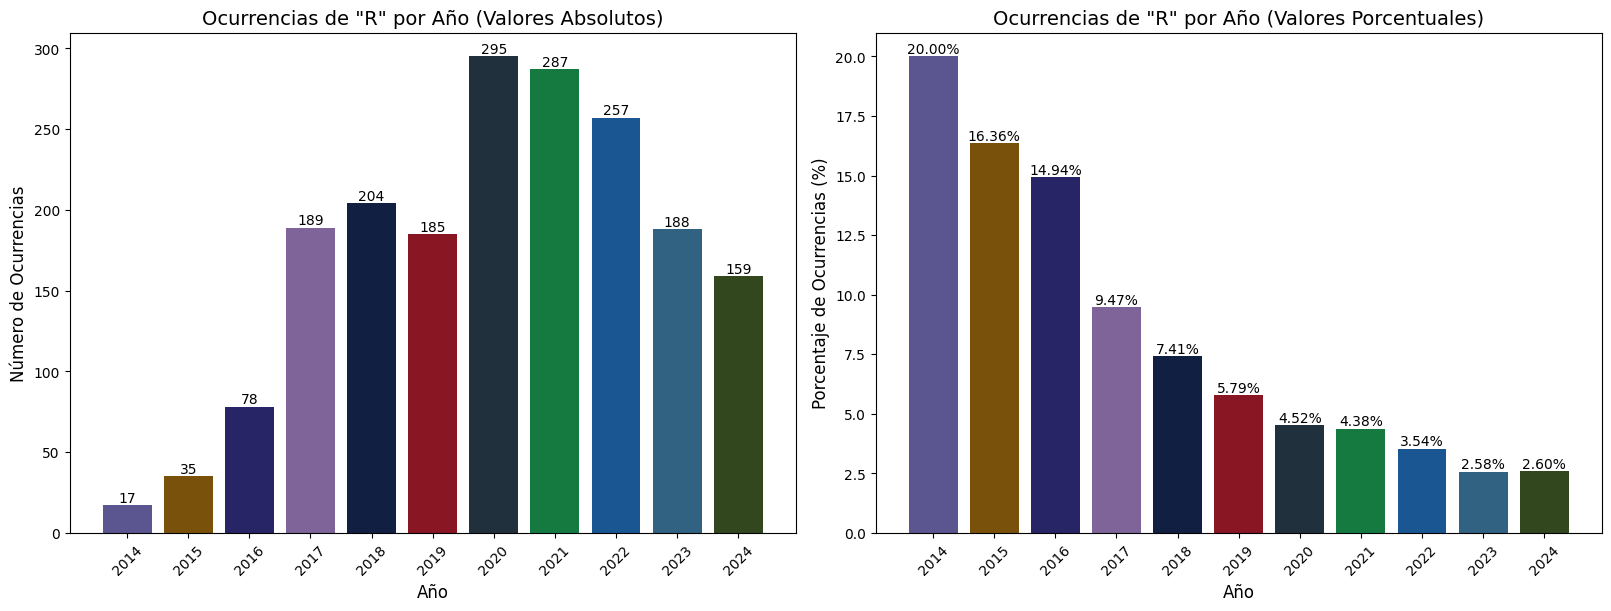

In [42]:
plot_occurrences_by_year(df_language, "language", "R", year_range=range(2014,2025))

El lenguaje R, muy utilizado por estadísticos (entre otros), muestra una clara y consistente disminución en el impacto proporcional anual, pasando del 20% al 2.6% del total de repositorios en solo 10 años. Esto podría estar relacionado con la evolución de bibliotecas de Python y otros enfoques estadísticos que se han desarrollado.

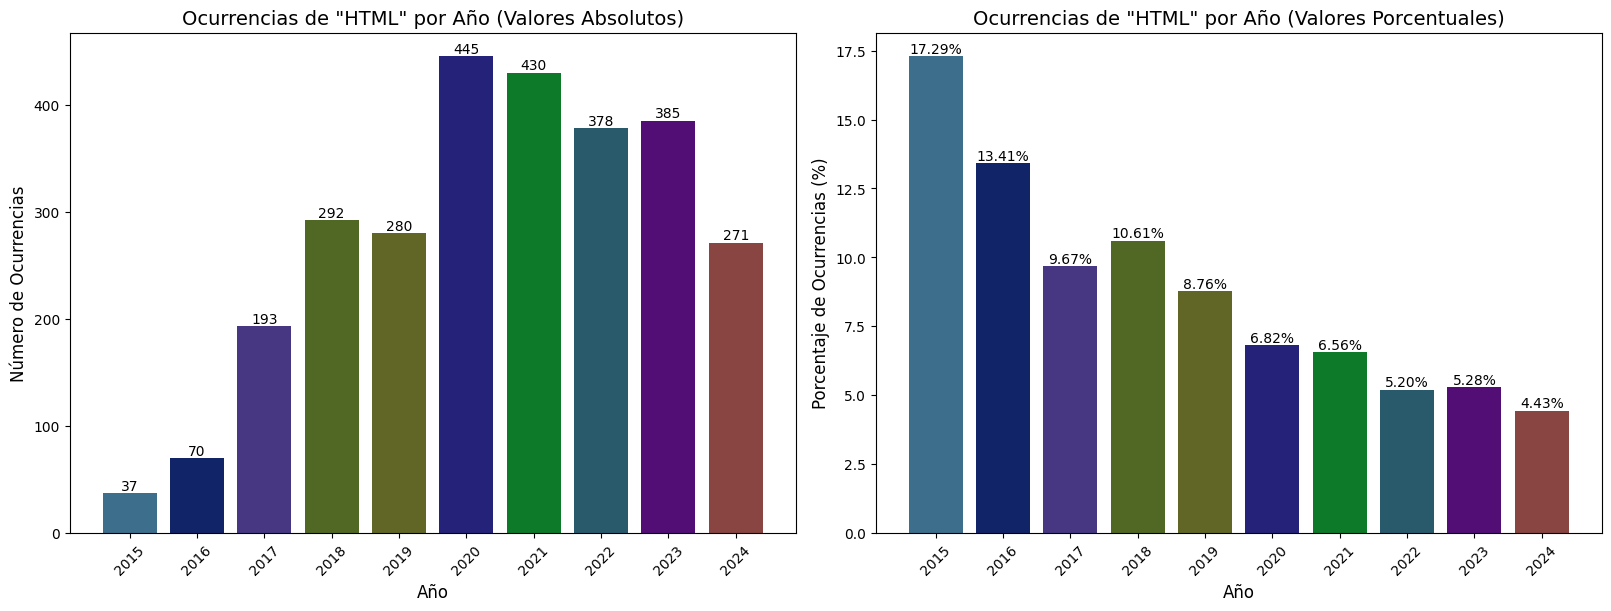

In [44]:
plot_occurrences_by_year(df_language, "language", "HTML", year_range=range(2015,2025))

HTML también enfrenta un escenario de decrecimiento constante año tras año.

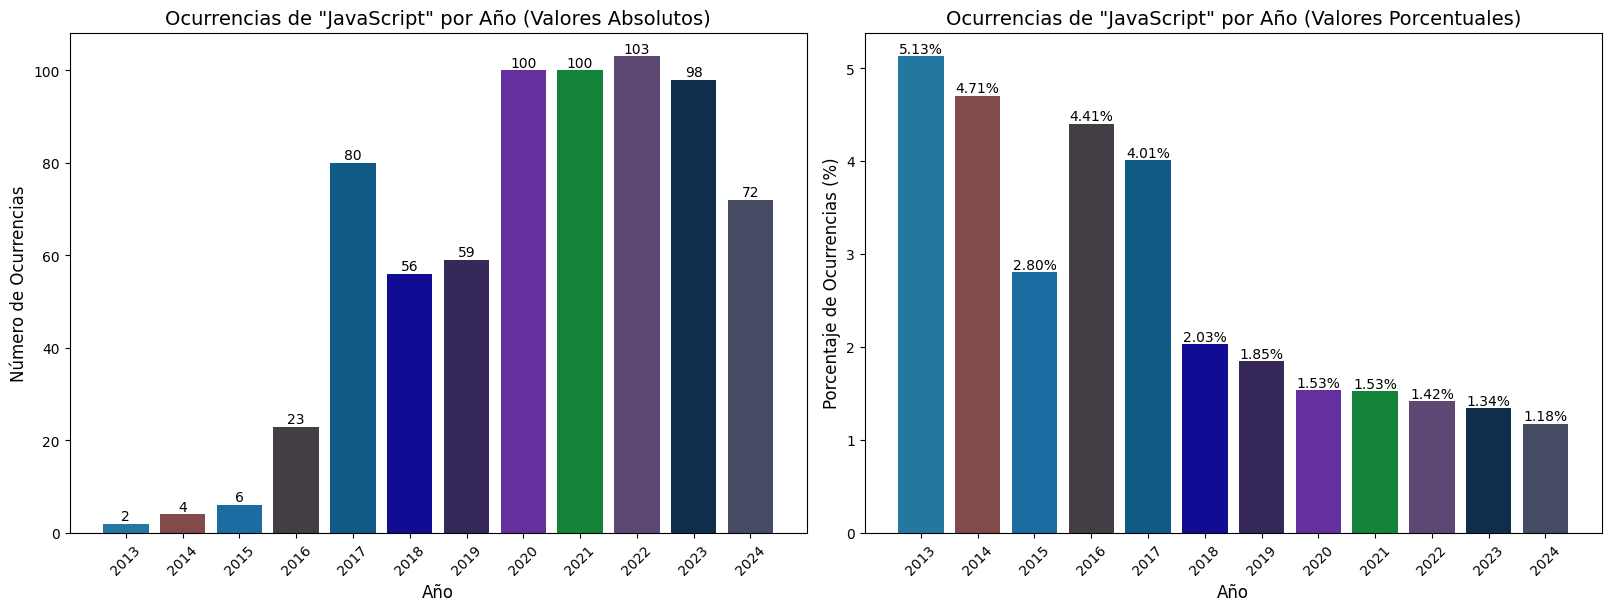

In [50]:
plot_occurrences_by_year(df_language, "language", "JavaScript", year_range=range(2013,2025))

Con Javascript no es diferente y es evidente el decrecimiento con el paso del tiempo, aunque nunca haya sido un lenguaje tan común, alcanzando un máximo de 5.13% de los repositorios.

### 3.3. Primeras exploraciones con la variable `topics`

In [51]:
# Pinta de la columna "topics", que contiene los temas de los repositórios

df.topics.sample(3)

# Listas de cadenas

47002    [data-engineering, data-science, machine-learn...
20612                             [analysis, data-science]
7157     [data-analysis, data-science, gui, mysql, plot...
Name: topics, dtype: object

Generando la primera visualización de los temas más presentes en todo el DataFrame. Nota: El tema "data-science" siempre representará la totalidad de los datos, ya que fue el filtro utilizado en la adquisición a través de la API.

In [52]:
# Generando un diccionario que contenga el tópico como clave y su contador como valor, ordenado de manera descendente

sorted_value_counts = count_topics(df, "topics")
print(sorted_value_counts)

{'data-science': 47317, 'machine-learning': 19307, 'python': 18780, 'data-analysis': 8277, 'data-visualization': 7656, 'pandas': 5185, 'jupyter-notebook': 3689, 'deep-learning': 3612, 'python3': 3267, 'data': 2986, 'r': 2880, 'numpy': 2628, 'matplotlib': 2127, 'statistics': 1937, 'machine-learning-algorithms': 1854, 'artificial-intelligence': 1779, 'scikit-learn': 1712, 'sql': 1617, 'exploratory-data-analysis': 1505, 'seaborn': 1459, 'data-mining': 1421, 'classification': 1377, 'nlp': 1292, 'visualization': 1282, 'ai': 1175, 'data-analytics': 1108, 'eda': 1072, 'sklearn': 993, 'analytics': 981, 'random-forest': 976, 'tensorflow': 976, 'linear-regression': 975, 'kaggle': 966, 'database': 938, 'streamlit': 933, 'data-engineering': 916, 'logistic-regression': 915, 'natural-language-processing': 897, 'dataset': 886, 'regression': 876, 'neural-network': 872, 'ml': 804, 'machinelearning': 797, 'data-cleaning': 762, 'datascience': 750, 'computer-vision': 741, 'analysis': 732, 'clustering': 71

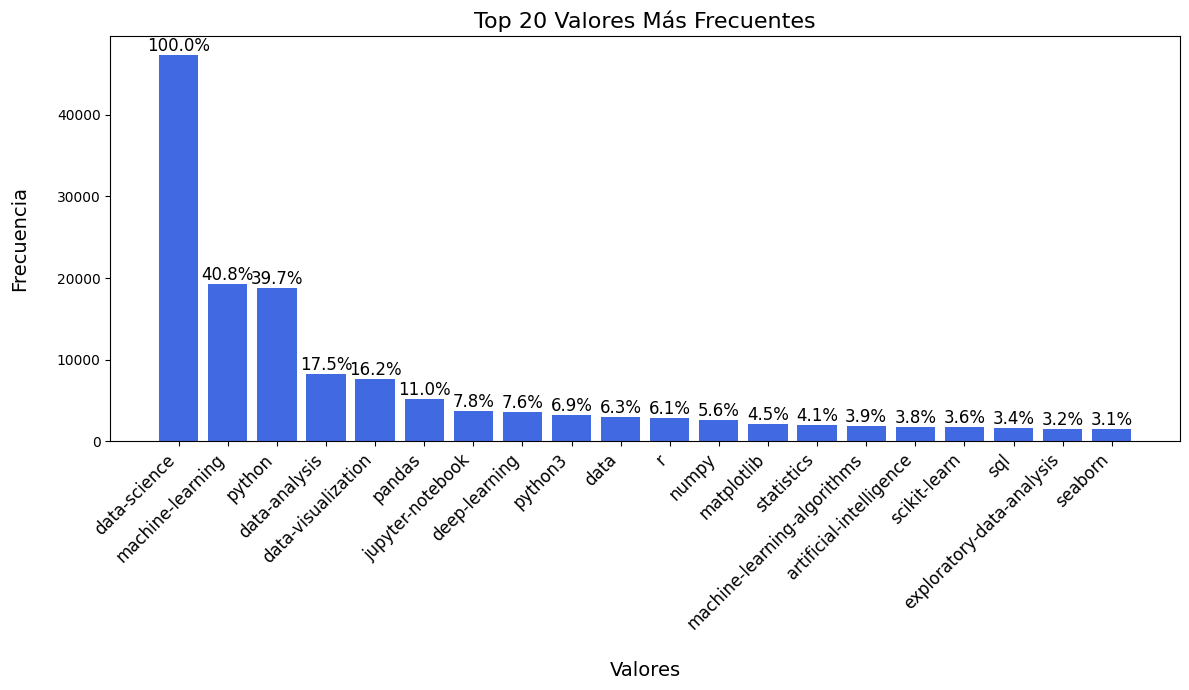

In [53]:
# Mostrando los 20 tópicos más utilizados en la historia

plot_top_20_numerical(df, sorted_value_counts)

El gráfico anterior no es muy útil para obtener conclusiones, pero nos ofrece pistas sobre cómo abordar esta información. Uno de sus problemas es la mezcla de lenguajes de programación, bibliotecas de Python y los temas propiamente dichos (que son el objetivo de nuestro análisis aquí). Además, los temas no son únicos. Por ejemplo, tenemos la presencia de *machine-learning* y *machine-learning-algorithms*, que para los fines de nuestro análisis podrían considerarse como un solo tópico.

La función `plot_string_with_normalization` se utilizará a continuación y es una función clave para la continuación de este proyecto:

`plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=None)`

Dado un DataFrame `<df>` y una columna `<column_name>`, la función rastrea todas las cadenas de interés pasadas en forma de lista de cadenas `<search_strings>` y las renombra como `<new_name>`. Además, genera una nueva columna en el dataframe con el título `<new_name_topics>`. Esta nueva columna contendrá todos los valores de `<column_name>`, pero con los valores de `<search_strings>` renombrados. La idea de esto es evitar problemas de múltiples nombres que representan el mismo tema, como por ejemplo *machine-learning*, *ml*, *ML*, *machine-learning-algorithms*, etc. La función también admite un rango de años a buscar `<year_range>`, definido como todo el intervalo temporal del dataframe por defecto.

La función muestra todos los valores encontrados correspondientes a `<search_strings>`, el valor que será reemplazado por `<new_name>`, y muestra un gráfico de barras con los valores absolutos y relativos (normalizados) de esos temas por año

Valores encontrados en <topics> correspondientes a ['llm', 'llms', 'large-language']: {'llm-recommendation', 'llm-finetuning', 'llm-deployment', 'llmops', 'open-source-llm', 'llm-inference', 'large-language-models', 'llm-guardrails', 'llmstack', 'fine-tuning-llm', 'llm-serving', 'large-language-model', 'llmops-questions', 'llms-langchain', 'visual-large-language-models', 'llm-framework', 'llm-course', 'multimodal-large-language-models', 'llms-interview-questions', 'groq-llm', 'llm-observability', 'llm-integration', 'llmops-tech-interview', 'llm-training', 'llms', 'llm-for-time-series', 'llms-tech-interview', 'llm-agent', 'llmops-interview-questions', 'video-llms', 'llm-evaluation', 'llm', 'llms-questions'}
Valores encontrados en <llm_topics> correspondientes a llm: {'llm'}

Número de valores correspondientes a <['llm', 'llms', 'large-language']> en <topics>: 33
Número de valores correspondientes a <llm> en <llm_topics>: 1


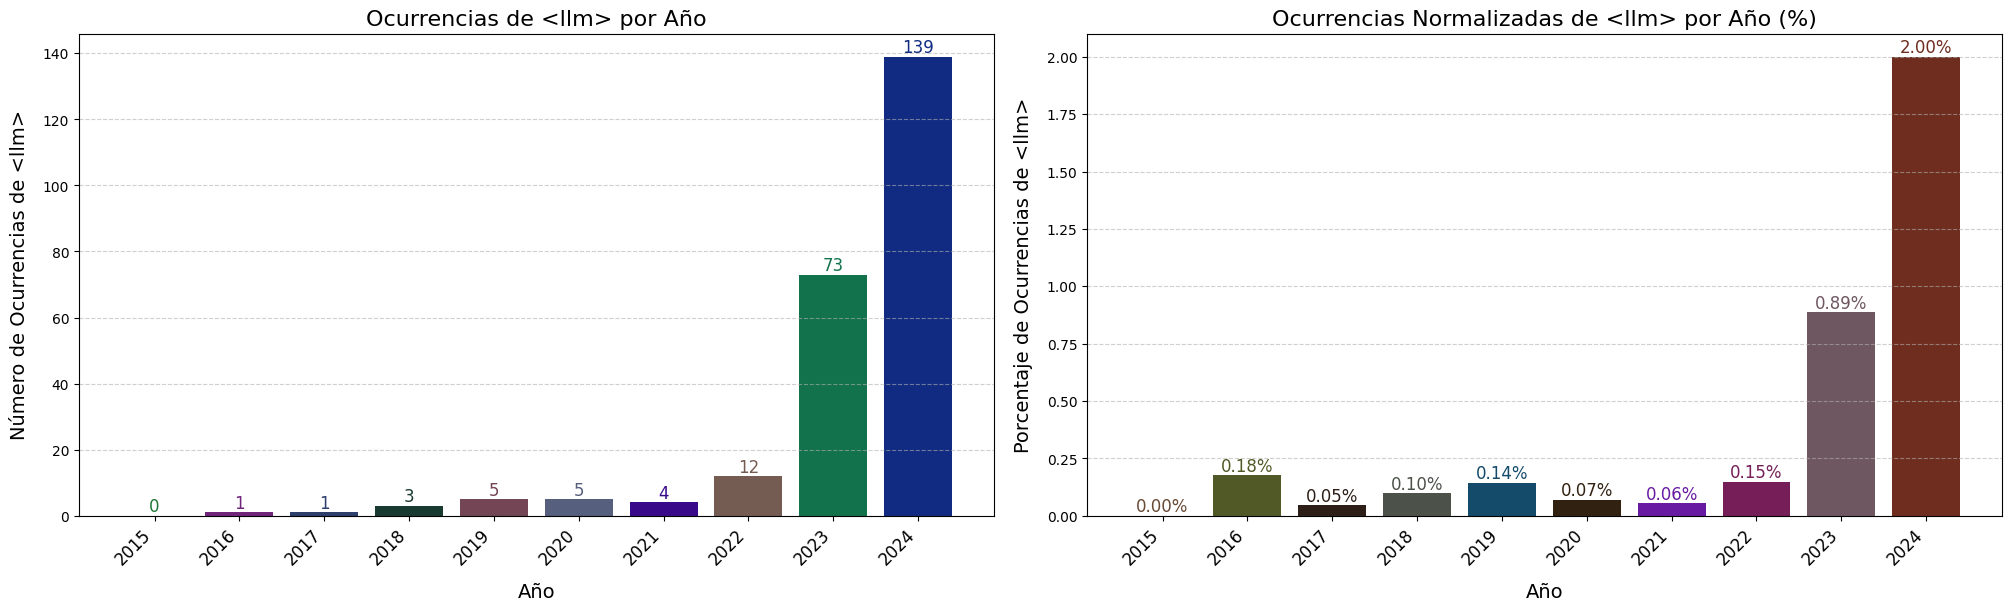

In [54]:
# Tópico: Large-Language Models (LLMs)

column_name = "topics"
search_strings = ["llm", "llms", "large-language"]
new_name = "llm"
year_range=range(2015,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['-ai', 'ai-', 'artificial-intelligence']: {'british-airways', 'ai-chatbot', 'midjourney-alternative-free-ai', 'ai-art', 'mage-ai', 'green-ai', 'ai-strategy', 'ai-with-khom', 'ai-papers', 'human-ai', 'ai-product-development', 'ai-courses', 'responsible-ai-widgets', 'kubernetes-ai', 'ai-pipeline', 'medical-ai-project', 'cohere-ai', 'ai-recommender', 'ai-models', 'human-ai-interaction', 'ai-planet', 'ai-interview-questions', 'ai-data-collection', 'ai-in-finance', 'generative-ai-projects', 'ethical-artificial-intelligence', 'ai-game', 'programming-for-ai', 'explainable-ai', 'game-ai', 'viktor-ai', 'math-ai', 'ai-product-management', 'ai-machine-learning', 'ai-tutorial', 'image-ai', 'boston-airbnb-listing', 'bangla-ai', 'agentic-ai', 'ai-algorithms', 'computer-aided-text-analysis', 'master-ai', 'ai-developers', 'pandas-ai', 'kaggle-us-airlines', 'ai-observability', 'global-ai-bootcamp', 'evidently-ai', 'fast-ai', 'ai-integration', 'splunk-

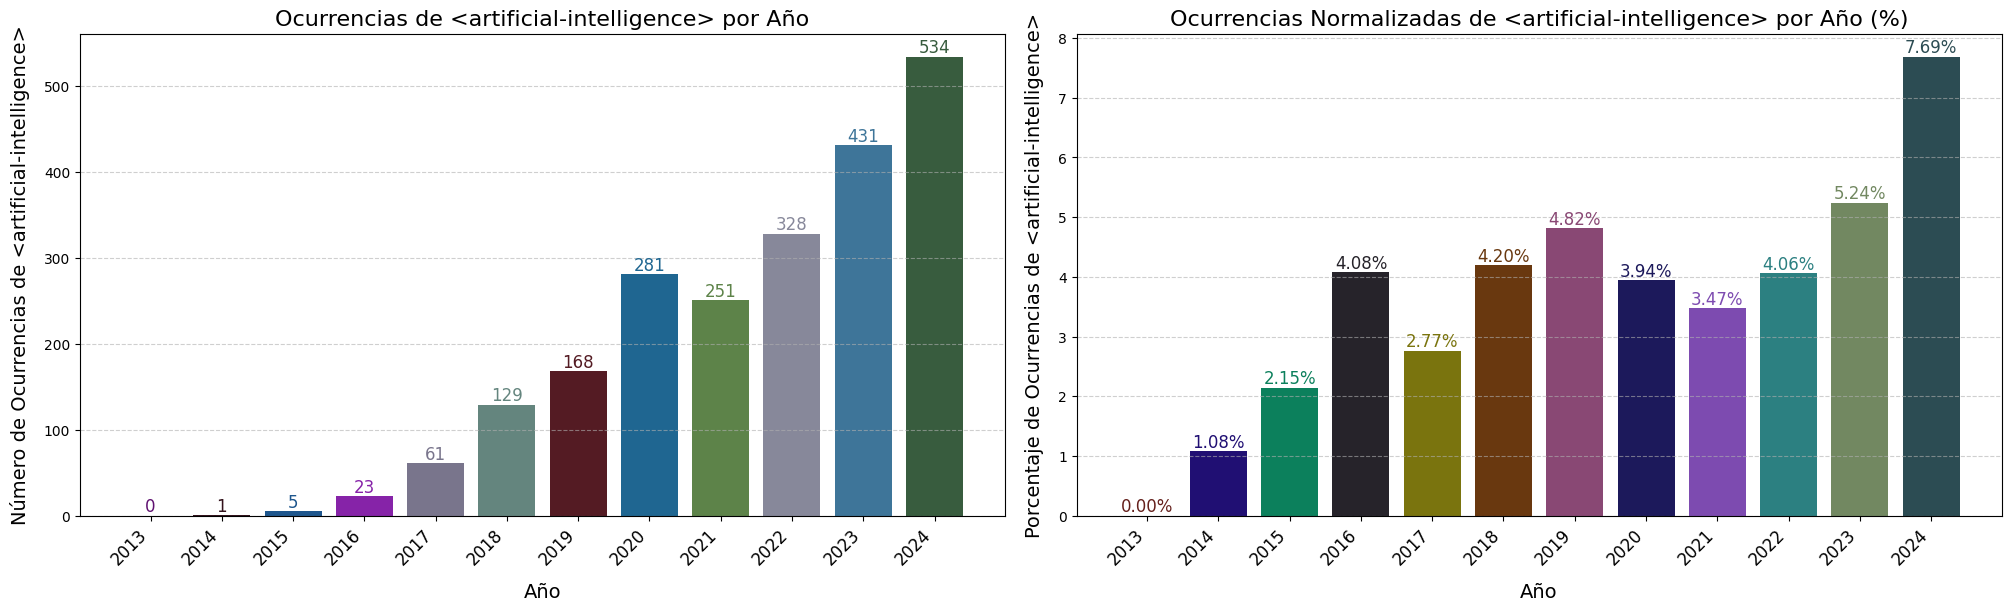

In [55]:
# # Tópico: Artificial Intelligence (AI)

column_name = "topics"
search_strings = ["-ai","ai-", "artificial-intelligence"]
new_name = "artificial-intelligence"
year_range=range(2013,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['generative']: {'generative-ai-pharmacist', 'generative-models', 'generative-ai-model', 'generative-ai', 'generative-adversarial-network', 'generative-ai-projects', 'generative-modelling', 'generative-vs-discriminative-model', 'generative-ai-tools', 'generativeai', 'generative-art', 'generative-adversarial-networks', 'generative', 'generative-music', 'generative-model'}
Valores encontrados en <generative-ai_topics> correspondientes a generative-ai: {'generative-ai'}

Número de valores correspondientes a <['generative']> en <topics>: 15
Número de valores correspondientes a <generative-ai> en <generative-ai_topics>: 1


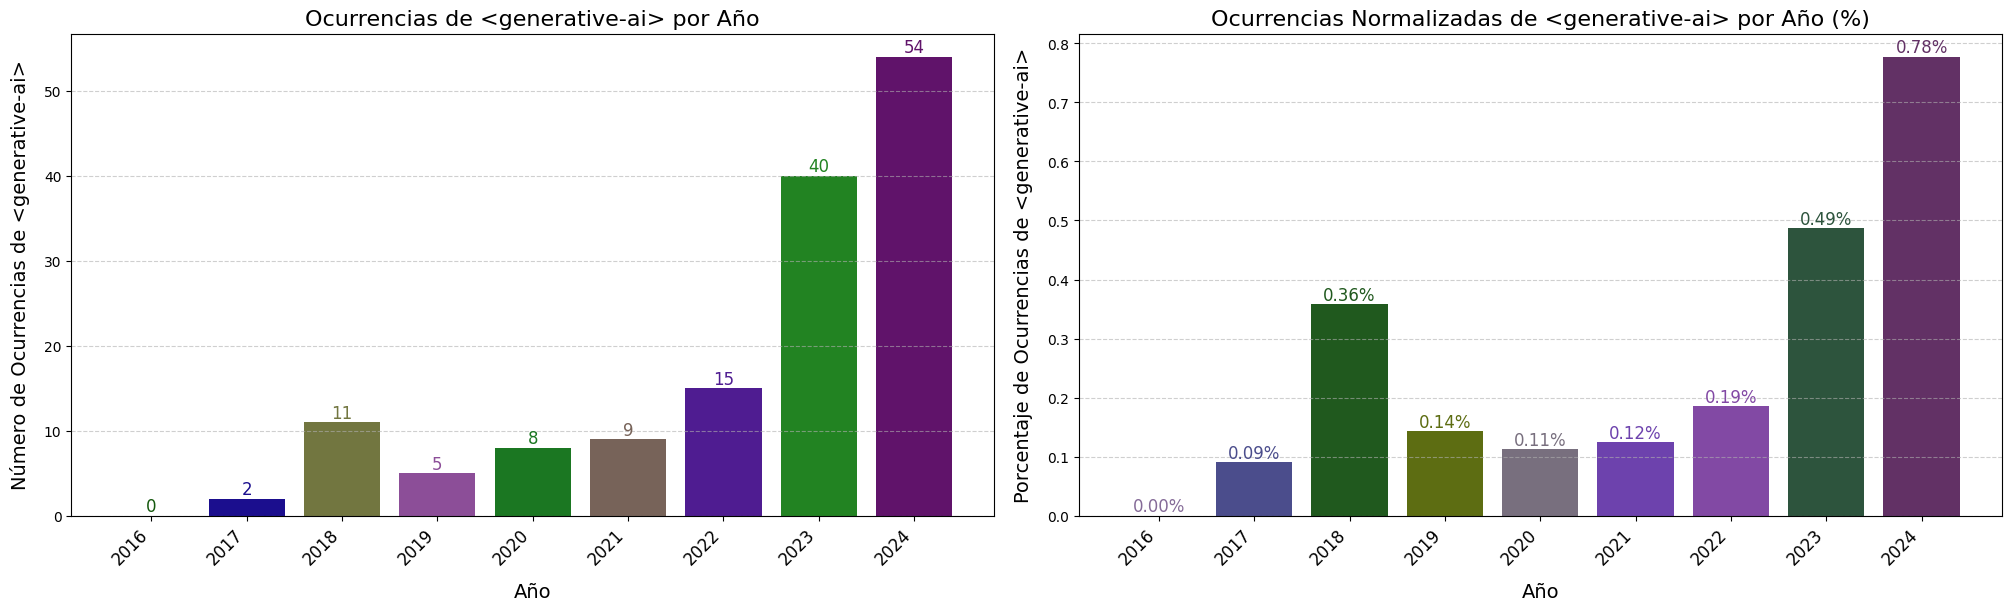

In [56]:
# Tópico: Generative Artificial Intelligence

column_name = "topics"
search_strings = ["generative"]
new_name = "generative-ai"
year_range=range(2016,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['big-data']: {'big-data-mart', 'big-data-processing', 'big-data-projects', 'big-data-storage-and-processing', 'big-data-platform', 'big-data-analysis', 'big-data-visualization', 'komputasi-big-data', 'big-data-and-ml', 'bda-big-data-analytics', 'big-data-cleaning', 'big-data', 'big-data-essentials', 'big-data-competition', 'api-access-to-big-dataa', 'big-data-analytics', 'big-data-hadoop'}
Valores encontrados en <big-data_topics> correspondientes a big-data: {'big-data'}

Número de valores correspondientes a <['big-data']> en <topics>: 17
Número de valores correspondientes a <big-data> en <big-data_topics>: 1


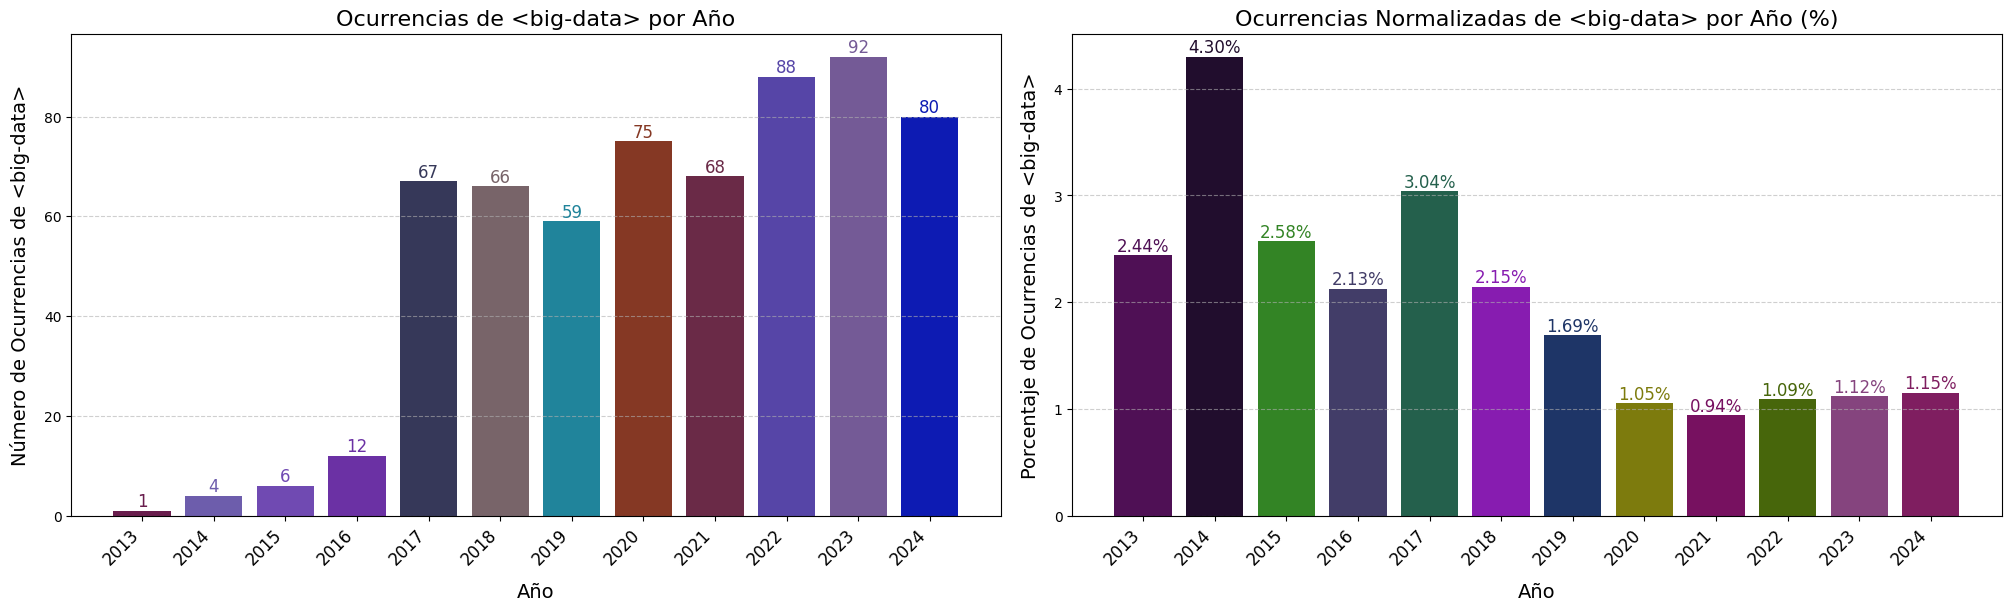

In [57]:
# Tópico: Big-Data

column_name = "topics"
search_strings = ["big-data"]
new_name = "big-data"
year_range=range(2013,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['ml', 'machine-learning']: {'mlztm-exercises', 'end-to-end-machine-learning', 'mldata', 'sql-ml-tech-interview', 'machine-learning-with-code', 'machine-learning-course', 'ml-design-patterns-interview-questions', 'ml-engineer', 'thoughtful-machine-learning', 'sql-ml-interview-questions', 'mldevops', 'pixy2-machine-learning', 'ml-system', 'ml-notes', 'mle', 'probablistic-machine-learning', 'ml-design-patterns-tech-interview', 'machine-learning-monitoring', 'mlflow-tracking', 'machine-learning-examples', 'ml-applications', 'mayu-ml', 'mlflow-sklearn', 'ml-classifiers', 'ml-operations', 'ml-design-patterns', 'mlproject', 'distributed-ml', 'bank-card-fraud-detection-using-machine-learning', 'email-spam-detection-with-machine-learning', 'graph-machine-learning', 'mljar-supervised', 'machine-learning-education', 'mlcourse-open', 'mlalgorithms', 'machine-learning-blog', 'python-ml-interview-questions', 'full-machine-learning-project', 'course

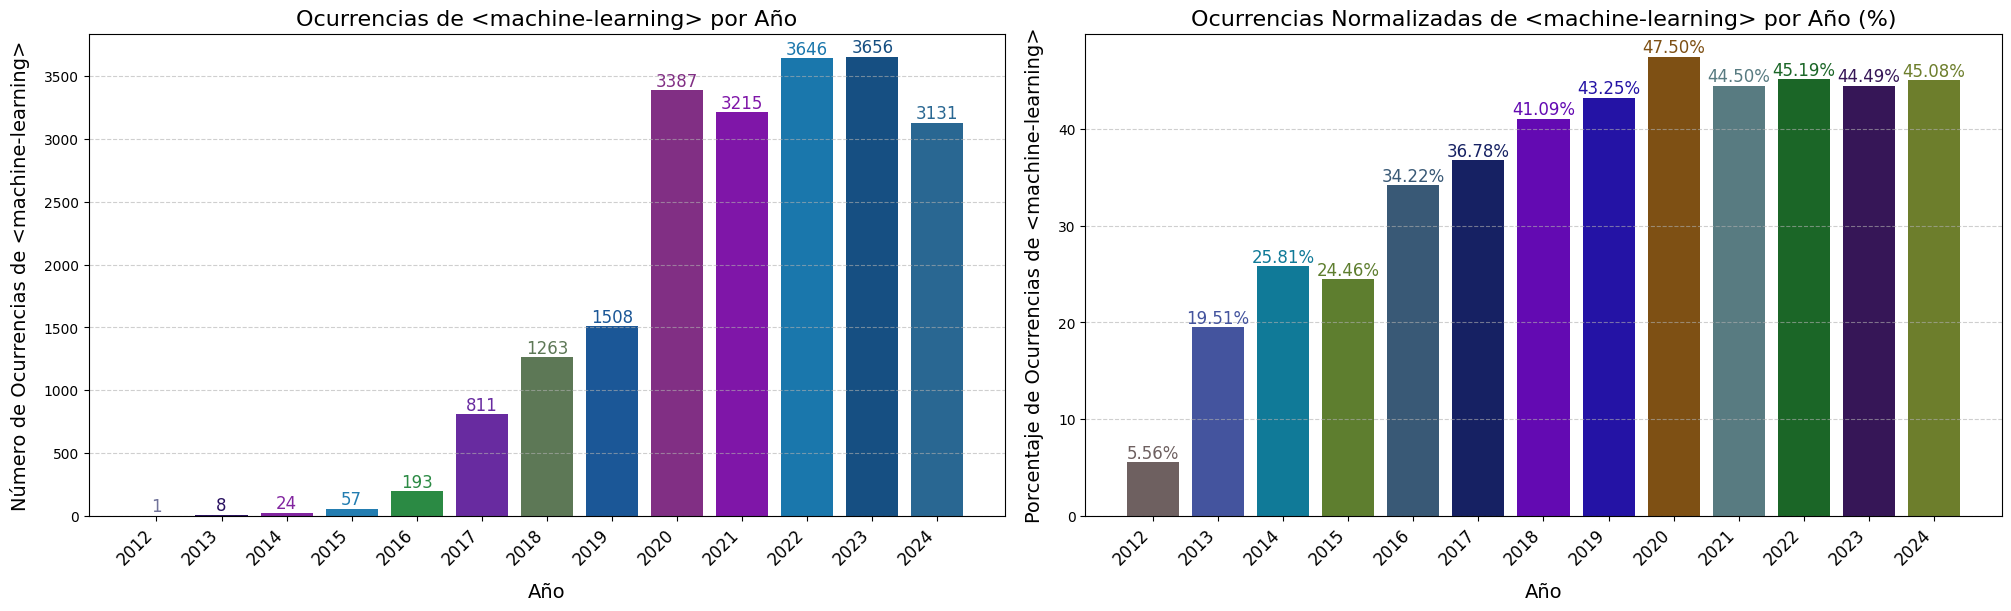

In [58]:
# Tópico: Machine-Learning

column_name = "topics"
search_strings = ["ml", "machine-learning"]
new_name = "machine-learning"
year_range=range(2012,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['dl', 'deep-learning']: {'deep-learning', 'udacity-deep-learning', 'dlschl', 'dlib-face-detection', 'deep-learning-engineer', 'neural-networks-and-deep-learning', 'deep-learning-healthcare', 'dlnd', 'deep-learning-practice', 'deep-learning-algorithm', 'deep-learning-r', 'interpretable-deep-learning', 'deep-learning-notebooks', 'deep-learning-questions', 'deep-learning-tech-interview', 'deep-learning-interview', 'matlab-deep-learning', 'deep-learning-projects', 'deep-learning-library', 'youtube-dl', 'udacity-deep-learning-nanodegree', 'deep-learning-ai', 'dlib', 'dlt', 'pytorch-deep-learning', 'deep-learning-api', 'deep-learning-framework', 'coursera-deep-learning', 'dl', 'deep-learning-example', 'tensorflow-deep-learning', 'deep-learning-python', 'deep-learning-models', 'dltk', 'geometric-deep-learning', 'online-deep-learning', 'dltk-model-zoo', 'dlookr', 'dlib-face-recognition', 'deep-learning-interview-questions', 'deep-learning-pyt

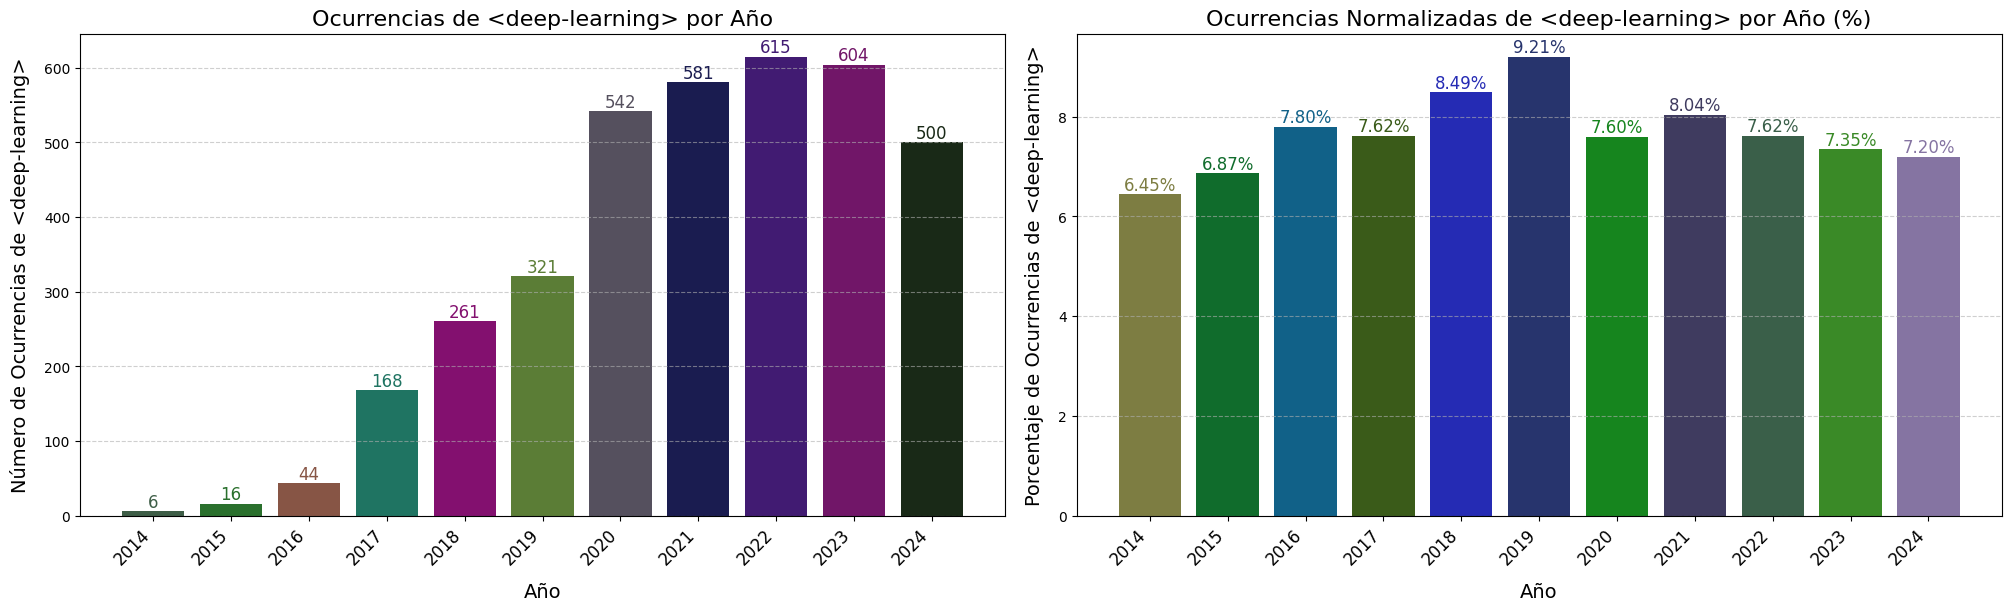

In [59]:
# Tópico: Deep-Learning

column_name = "topics"
search_strings = ["dl", "deep-learning"]
new_name = "deep-learning"
year_range=range(2014,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['computer-vision']: {'computer-vision-books', 'computer-vision-project', 'fine-tuning-computer-vision', 'computer-vision', 'computer-vision-metrics', 'computer-vision-questions', 'computer-vision-opencv', 'computer-vision-tech-interview', 'computer-vision-interview-questions', 'computer-vision-projects', 'computer-vision-algorithms'}
Valores encontrados en <computer-vision_topics> correspondientes a computer-vision: {'computer-vision'}

Número de valores correspondientes a <['computer-vision']> en <topics>: 11
Número de valores correspondientes a <computer-vision> en <computer-vision_topics>: 1


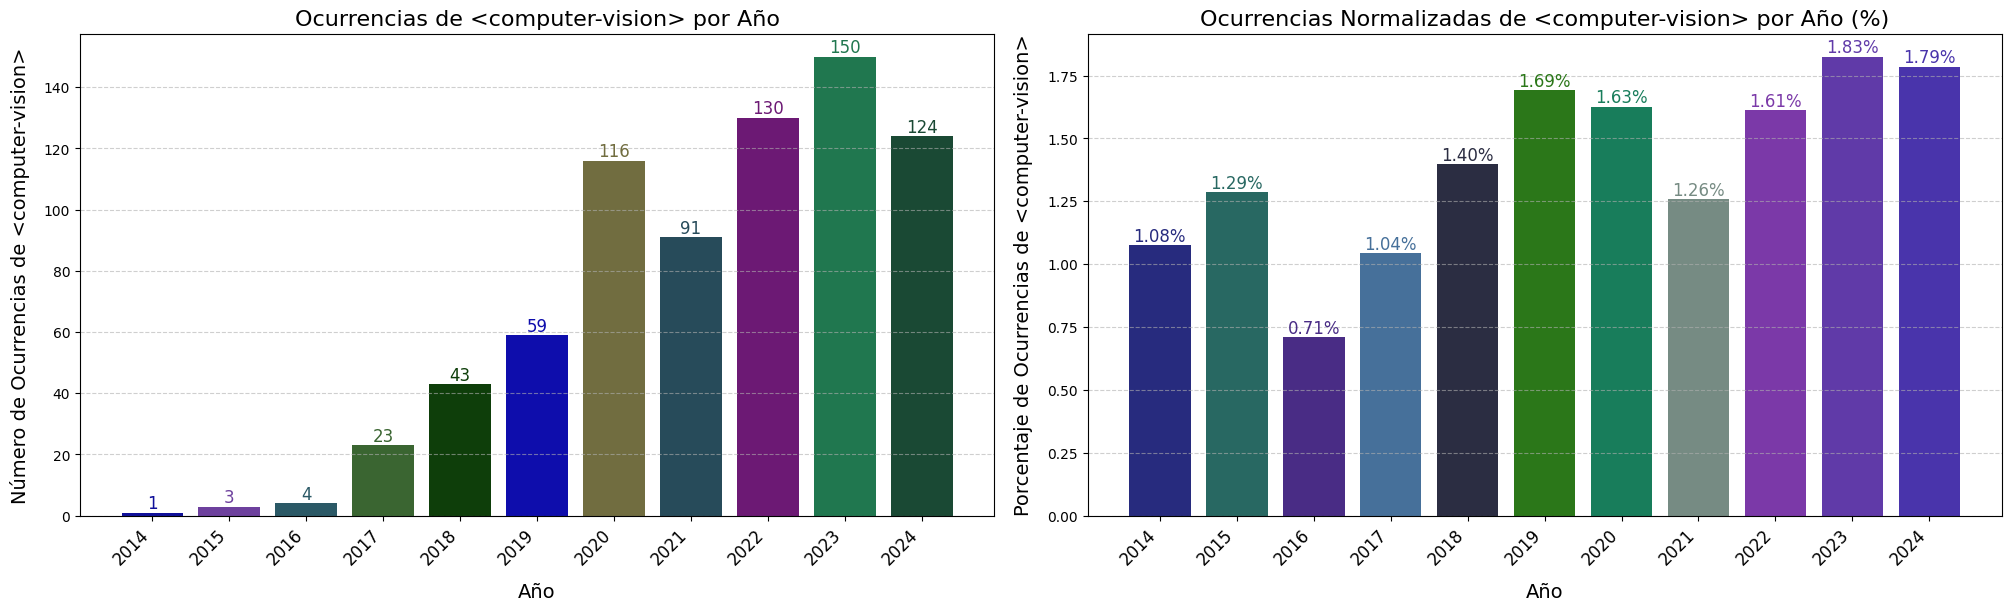

In [60]:
# Tópico: Computer-Vision

column_name = "topics"
search_strings = ["computer-vision"]
new_name = "computer-vision"
year_range=range(2014,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['business-intelligence', 'power-bi', 'powerbi', 'tableau']: {'tableau-visualization', 'tableauprojects', 'tableauskills', 'tableau-prep', 'powerbi-custom-visuals', 'power-bi-desktop', 'business-intelligence-domain', 'tableau-visualizations', 'tableau-pubic', 'powerbi-dashboards', 'tableau-repository', 'tableau-dashboard', 'power-bi-dashboard', 'tableau-dashboards', 'tableau-workbooks', 'business-intelligence-analytics', 'powerbidashboard', 'powerbireports', 'data-analysis-project-powerbi', 'business-intelligence-team', 'tableau-public', 'microsoft-power-bi', 'tableau-extension', 'dashboards-powerbi', 'powerbi-visuals', 'business-intelligence', 'tableaustory', 'powerbi', 'tableau-server', 'powerbi-desktop', 'power-bi-visual', 'data-analysis-tableau', 'tableau-project', 'power-bi', 'adaptive-business-intelligence', 'tableauvisualizations', 'powerbi-report', 'tableaulearning', 'powerbi-reports', 'power-bi-dax', 'tableau', 'powerbi-servic

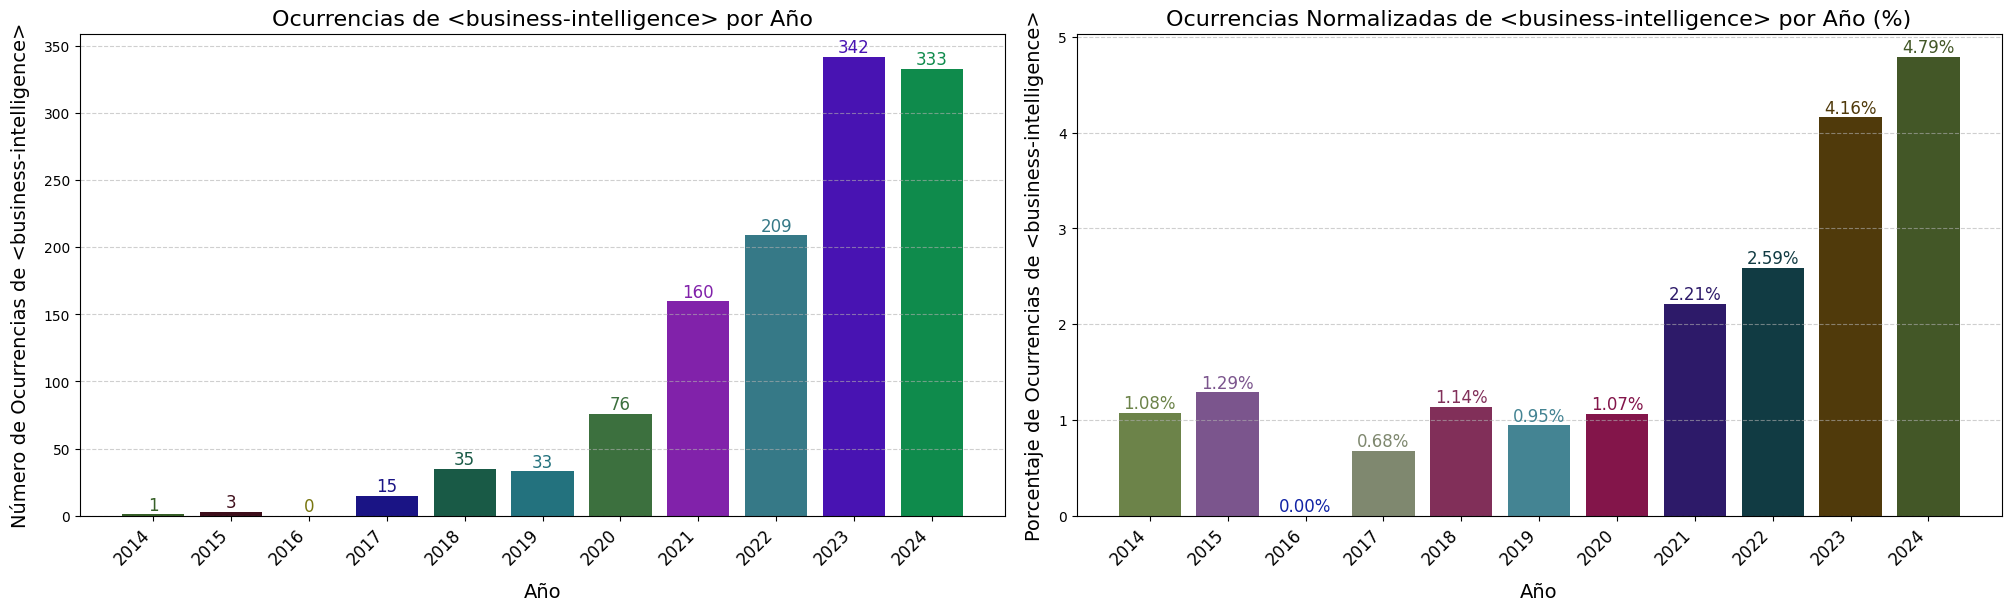

In [61]:
# Tópico: Business Intelligence (BI)

column_name = "topics"
search_strings = ["business-intelligence", "power-bi", "powerbi", "tableau"]
new_name = "business-intelligence"
year_range=range(2014,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['deploy', 'mlops', 'devops']: {'continuous-deployment', 'heroku-deployment', 'devops-tools', 'deployments', 'aws-deployment', 'mlops-workshop', 'batch-deployment', 'machine-learning-deployment', 'llm-deployment', 'mlops-project', 'devops-jobs', 'deploy-machine-learning', 'mlops', 'netlify-deployment', 'model-deploy', 'elasticbeanstalk-deployment', 'cloud-deployment', 'mlops-community', 'mlops-tool', 'ai-deployment', 'mlops-zoomcamp', 'deploy', 'deployed', 'streamlit-deployment', 'practical-mlops', 'model-deployment', 'devops-teams', 'mlops-pipeline', 'kubernetes-deployment', 'sagemaker-deployment', 'database-deployment', 'vercel-deployment', 'devops-pipeline', 'github-pages-deployment', 'canary-deployment', 'deployement', 'canary-deployments', 'mlops-template', 'ml-deployment', 'mlops-workflow', 'machine-learning-models-deployment', 'mlops-tech-interview', 'deployment', 'mlops-questions', 'azure-devops', 'devops-for-data-science', 'ml

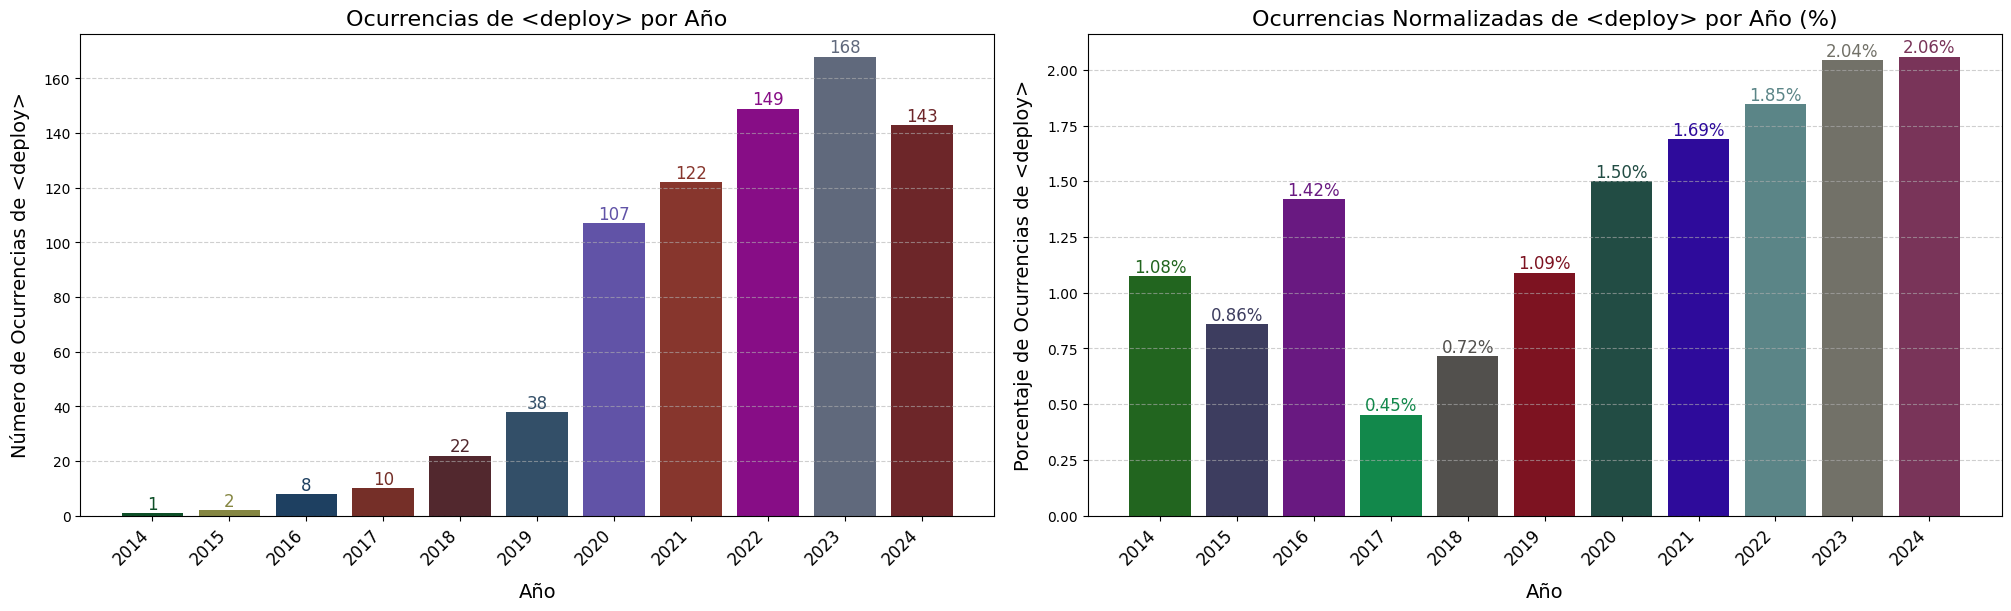

In [62]:
# Tópico: Deploy

column_name = "topics"
search_strings = ["deploy", "mlops", "devops"]
new_name = "deploy"
year_range=range(2014,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['nlp', 'natural-language']: {'multilingual-nlp', 'nlp-apis', 'deutsch-nlp', 'nlp-models', 'nlptk', 'arabic-nlp', 'nlpaug', 'nlp-api', 'deep-nlp', 'nlp-course', 'bangla-nlp', 'natural-language-inference', 'nlp-dependency-parsing', 'nlp-for-customer-satisfaction', 'nlp', 'chinese-nlp', 'nlp-feature-engineering', 'nlp-model', 'nlp-arabic', 'bengali-nlp', 'nlp-primitives', 'urdu-nlp', 'stanford-nlp', 'nlpmodels', 'italian-nlp', 'nlp-classification-model', 'natural-language-processing', 'nlp-library', 'natural-language-understanding', 'nlp-dataset-creation', 'russian-nlp', 'spark-nlp', 'nlp-keywords-extraction', 'nlp-projects', 'nlp-metrics', 'natural-language-proceessing', 'nlp-internship-assignment', 'nlp-resources', 'nlp-training', 'natural-language', 'watson-natural-language', 'natural-language-generation', 'nlproc', 'nlp-questions', 'nlp-deep-learning', 'nlp-datasets', 'nlp-parsing', 'standford-nlp', 'natural-language-procressing', 'n

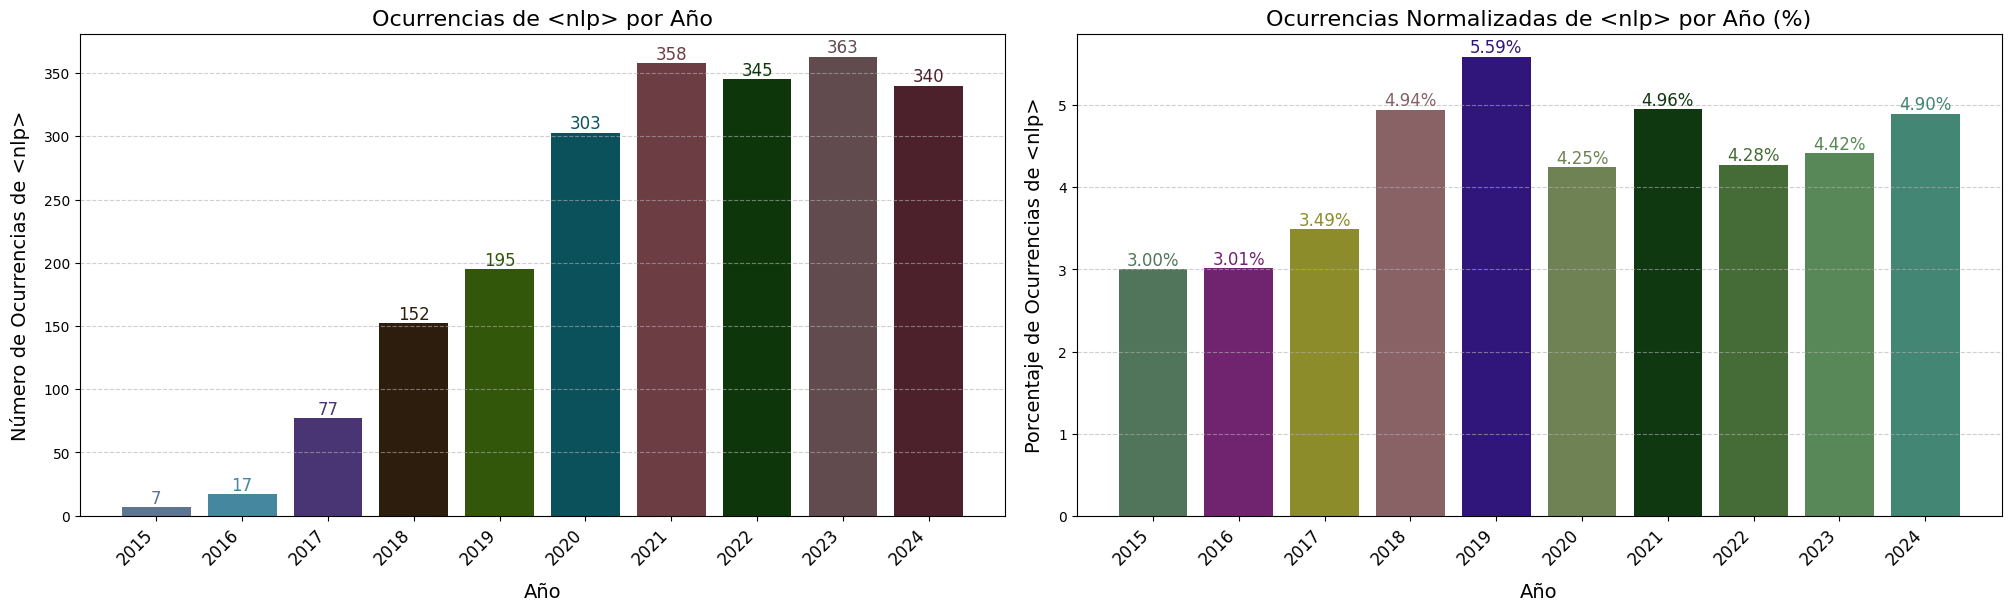

In [63]:
# Tópico: Natural Language Processing (NLP)

column_name = "topics"
search_strings = ["nlp", "natural-language"]
new_name = "nlp"
year_range=range(2015,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

Valores encontrados en <topics> correspondientes a ['health', 'medical', 'diagnosis']: {'medical-image', 'medical-data', 'medical-marijuana', 'medical-image-processing', 'medical-imaging', 'structural-health-monitoring', 'medical-education', 'healthcare-datasets', 'medical-science', 'apple-health-analytics', 'medical-ai-project', 'medical-cost-personal-dataset', 'medical-diagnostics', 'medical-analysis', 'battery-health-prediction', 'personal-health-data-', 'medical-diagnosis', 'community-health-science', 'fetal-health', 'healthcare-data', 'health-diagnosis', 'health-economic-evaluation', 'health-informatics-systems', 'digital-health', 'health-economics', 'health-data', 'indonesia-healthcare', 'breast-cancer-diagnosis', 'medical-information', 'project-health', 'deep-learning-healthcare', 'national-health', 'healthinformatics', 'medical', 'healthcare-domains', 'healthit', 'medical-insurance-costs', 'healthtech', 'cancer-diagnosis', 'world-health-organization', 'maternal-health', 'cardia

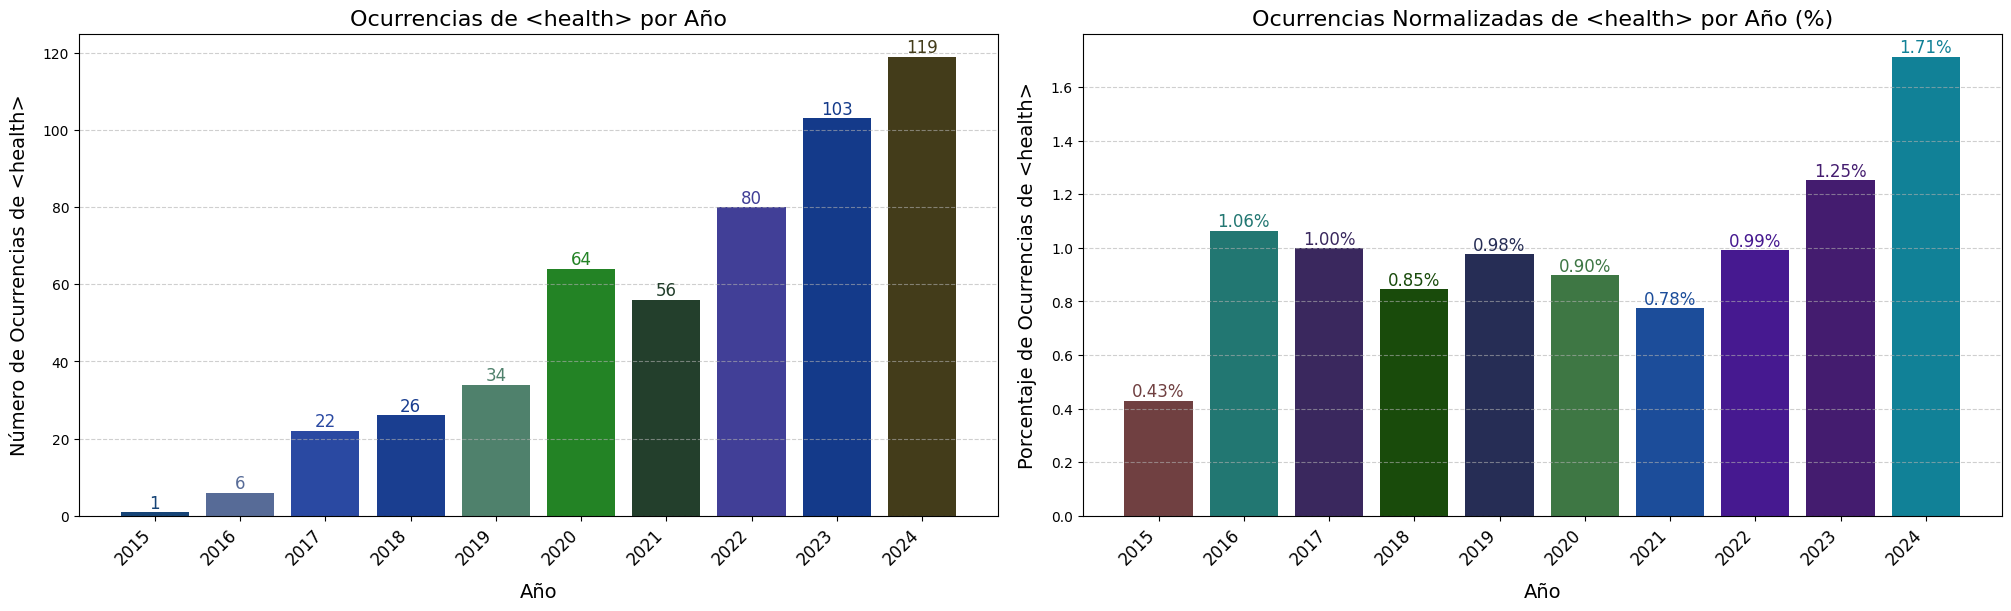

In [64]:
# Tópico: Health (tópico de interese personal)

column_name = "topics"
search_strings = ["health", "medical", "diagnosis"]
new_name = "health"
year_range=range(2015,2025)

plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=year_range)

In [65]:
df.columns

Index(['id', 'name', 'full_name', 'owner', 'stargazers_count', 'forks_count',
       'watchers_count', 'open_issues_count', 'topics', 'created_at',
       'has_issues', 'has_projects', 'has_downloads', 'has_discussions',
       'has_wiki', 'score', 'year', 'llm_topics',
       'artificial-intelligence_topics', 'generative-ai_topics',
       'big-data_topics', 'machine-learning_topics', 'deep-learning_topics',
       'computer-vision_topics', 'business-intelligence_topics',
       'deploy_topics', 'nlp_topics', 'health_topics'],
      dtype='object')

### 3.4. Analizando la popularidad y el compromiso en los repositorios

Con el fin de buscar una manera de medir el grado de impacto que un repositorio tiene en la comunidad de datos de GitHub, tomaremos en cuenta las siguientes variables numéricas: *stargazers_count*, *watchers_count*, *open_issues_count*, *forks_count*.

#### Entendiendo las variables:
* `stargazers_count`: Refleja cuántas personas han "marcado" el repositorio como interesante, es decir, puede ser un fuerte indicador de popularidad;

* `watchers_count`: Refleja cuántas personas están observando el repositorio, es decir, están interesadas en seguir el progreso del proyecto, lo que también es una buena métrica de compromiso;

* `forks_count`: Refleja cuántos repositorios derivados se han creado a partir de este repositorio, lo que es un indicador claro de compromiso activo. Una alta cantidad de forks generalmente sugiere que otras personas están contribuyendo de manera activa, ya sea para corregir problemas, implementar funcionalidades o aprender del proyecto.

* `open_issues_count`: Refleja el número de problemas abiertos que requieren atención. Un valor más alto puede indicar mayor actividad en el repositorio, pero no es necesariamente un indicador directo de popularidad o compromiso positivo, ya que también puede reflejar problemas o falta de mantenimiento.

La función `plot_scatter_with_regression` recibe un `<df>` y una lista de columnas `<columns>`, mostrando una secuencia de gráficos de dispersión de todas las variables contra todas y trazando una regresión lineal que las resume. También devuelve el coeficiente de correlación de Pearson para cada interacción.

La idea aquí es demostrar si las variables están correlacionadas. Una baja correlación entre *stargazers_count* y *forks_count*, por ejemplo, podría indicar que la popularidad y el compromiso no están directamente relacionados. Por otro lado, una baja correlación entre *stargazers_count* y *watchers_count* podría llevarnos a cuestionar la interpretación de si realmente son medidas de popularidad. 

De esta manera, este entendimiento es **esencial** para continuar con los análisis y validar la relación entre las variables.

Correlación de Pearson entre stargazers_count y watchers_count: 1.00
Correlación de Pearson entre stargazers_count y open_issues_count: 0.49
Correlación de Pearson entre stargazers_count y forks_count: 0.89
Correlación de Pearson entre watchers_count y open_issues_count: 0.49
Correlación de Pearson entre watchers_count y forks_count: 0.89
Correlación de Pearson entre open_issues_count y forks_count: 0.48


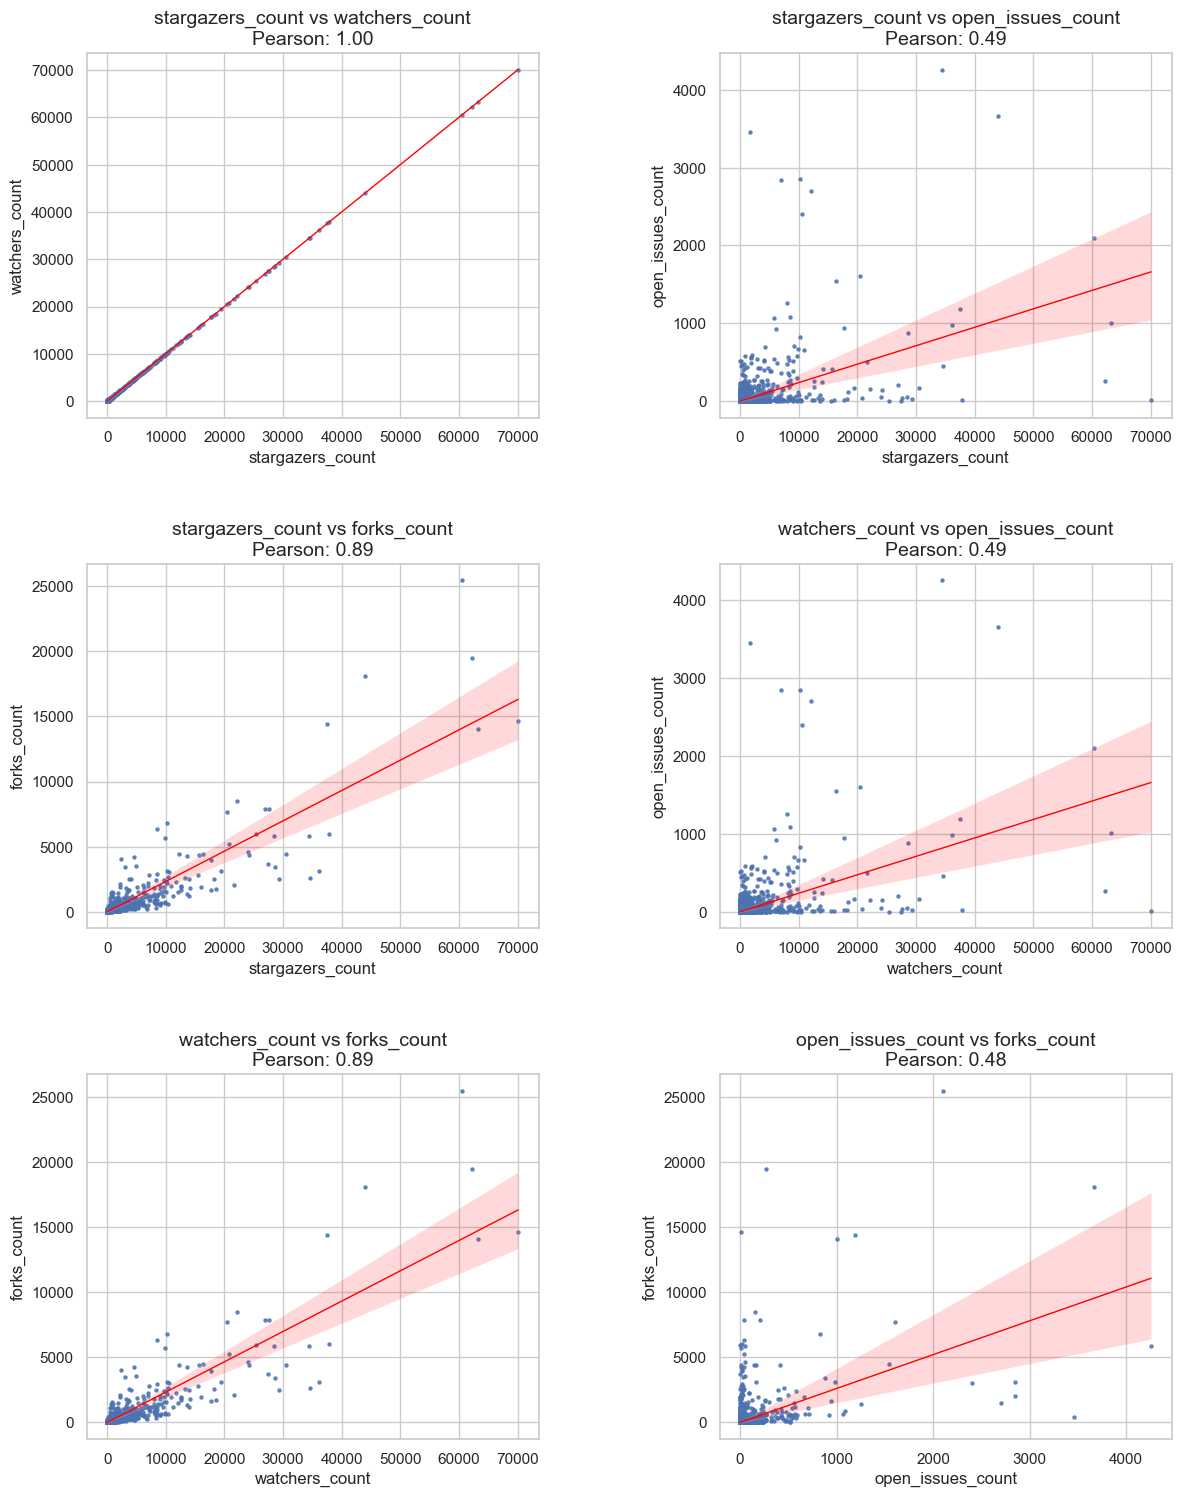

In [66]:
columns = ["stargazers_count", "watchers_count", "open_issues_count", "forks_count"]
plot_scatter_with_regression(df, columns)

* El gráfico y la correlación de Pearson = 1 para *stargazers_count* y *watchers_count* reflejan una correlación absoluta, lo que solo puede ocurrir si los datos son idénticos. Es decir, aunque sean dos columnas diferentes, tienen exactamente los mismos valores. De esta manera, no importa utilizar una u otra para análisis futuros. Continuaremos con *stargazers_count*.

* El gráfico y la correlación de Pearson entre *stargazers_count* y *forks_count* = 0.89 reflejan una alta correlación positiva entre ambas, lo que nos proporciona argumentos para validar la hipótesis de que la popularidad y el compromiso activo están correlacionados, pero no son lo mismo.

* El gráfico y la correlación de Pearson menor que 0.5 para *open_issues_count* contra las otras variables, sumado al hecho de que su interpretabilidad es ambigua, me llevará a descartar esta variable para los análisis posteriores.

### 3.5. Preparación de los datos para pruebas de hipótesis

Los datos numéricos que se utilizarán, stargazers_count y forks_count, tienen una distribución extremadamente desorganizada, asimétrica y caótica. Veamos lo que nos dice .describe()

In [67]:
print(df["stargazers_count"].describe(percentiles=[.25, .50, .75, .95]))
print("\nMediana:", df["stargazers_count"].median())
print("\nNúmero de datos com stargazers_count = 0:", len(df[df["stargazers_count"] == 0]))
print("Número de datos en todo el DataFrame", len(df))
print("Más de:",round(len(df[df["stargazers_count"] == 0])/len(df),2), "% de los datos son iguales a 0")

count    47318.000000
mean        60.673676
std        981.126563
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
95%         39.000000
max      70101.000000
Name: stargazers_count, dtype: float64

Mediana: 0.0

Número de datos com stargazers_count = 0: 25389
Número de datos en todo el DataFrame 47318
Más de: 0.54 % de los datos son iguales a 0


Observe que el valor máximo es 1798x mayor que el percentil 95%, y que la mediana es 0, lo que significa que más de la mitad de los valores son 0. Esta distribución sugiere una cantidad aberrante de valores anómalos.

Esto se hace aún más evidente al trazar un diagrama de caja, que hace imposible ver la caja, ya que todo el gráfico está compuesto por valores anómalos.

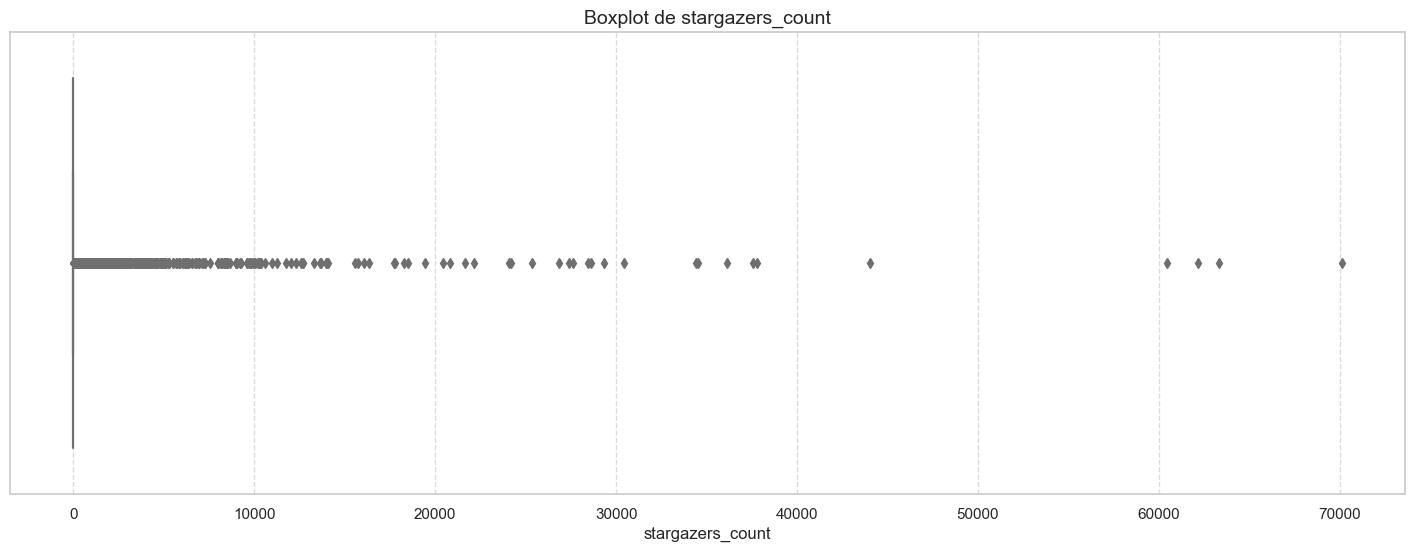

In [68]:
boxplot_generate(df, "stargazers_count")

Esta distribución completamente desbalanceada puede generar desconcierto en un primer momento y levantar sospechas sobre la confiabilidad de los datos. Sin embargo, parece que todo está en orden con ellos, y lamentablemente, este fenómeno sería esperado. GitHub, al igual que en redes sociales como Instagram, presenta un escenario donde unos pocos repositorios acaparan la mayor parte de la atención debido a factores como la visibilidad de sus creadores, la viralidad, la calidad de la documentación o la resolución de problemas comunes. Este fenómeno sigue la **Ley de Potencia**, en la que pocos repositorios son muy populares, mientras que la mayoría permanece en la oscuridad. Los repositorios menos conocidos carecen de los mismos recursos de marketing y difusión, lo que limita su visibilidad y compromiso. Así, se genera un círculo de retroalimentación positiva para los repositorios más populares, aumentando aún más la desigualdad de visibilidad en la plataforma.

#### Cómo se prepararán los datos:

* Se creará un nuevo DataFrame, `df_teste`, que será una fracción de df e incluirá únicamente valores anómalos, dado que el objetivo es utilizar medidas de popularidad y compromiso, y la mayoría de los datos en df tienen un valor de 0 en ambas métricas.

* `df_teste` será sometido a una normalización temporal. Esto es relevante porque, mientras más antiguo es un repositorio, mayor tiempo de exposición ha tenido para ser encontrado por los usuarios. Naturalmente, los repositorios más recientes pueden no tener valores absolutos tan altos, pero sí mayor impacto. Por ejemplo: un repositorio de 2024 con un forks_count de 5 podría ser más relevante en términos de compromiso que uno de 2014 con 13 forks. Así, el objetivo de la normalización es “penalizar” repositorios más antiguos y aumentar el peso de los más recientes.

Para ello, se utilizarán dos funciones: `normalize_by_days` y `normalize_by_months`, una para normalizar por días y otra por meses.



In [69]:
# La función `detect_outliers` nos devuelve el valor a partir del cual los datos son anómalos y recibe un factor de ajuste. 
# Utilizaremos **1.5 IQR**, que es el factor más comúnmente empleado.

star_outlier_cutoff = detect_outliers(df, 'stargazers_count', factor=1.5)  
print(f"Son outliers para stargazers_count los valores superiores a: {star_outlier_cutoff}")

forks_outlier_cutoff = detect_outliers(df, 'forks_count', factor=1.5)  
print(f"Son outliers para forks_count los valores superiores a: {forks_outlier_cutoff}")


Son outliers para stargazers_count los valores superiores a: 5.0
Son outliers para forks_count los valores superiores a: 2.5


In [70]:
limite_superior = df['stargazers_count'].quantile(0.990)

# Filtra os dados 
df_teste = df[
    (df['stargazers_count'] > 5) &
    (df['forks_count'] > 2.5) &
    (df["year"] > 2010)  &
    (df['stargazers_count'] <= limite_superior)
]

# Genera df solo con valores anómalos 

df_outlier = df[
    (df["year"] > 2010)  &
    (df['stargazers_count'] >= limite_superior)
]

print("df_teste possui", round(len(df_teste)*100/len(df),2), "% de los valores de df")
print("df_outlier possui", round(len(df_outlier)*100/len(df),2), "% de los valores de df")

df_teste possui 9.17 % de los valores de df
df_outlier possui 1.0 % de los valores de df


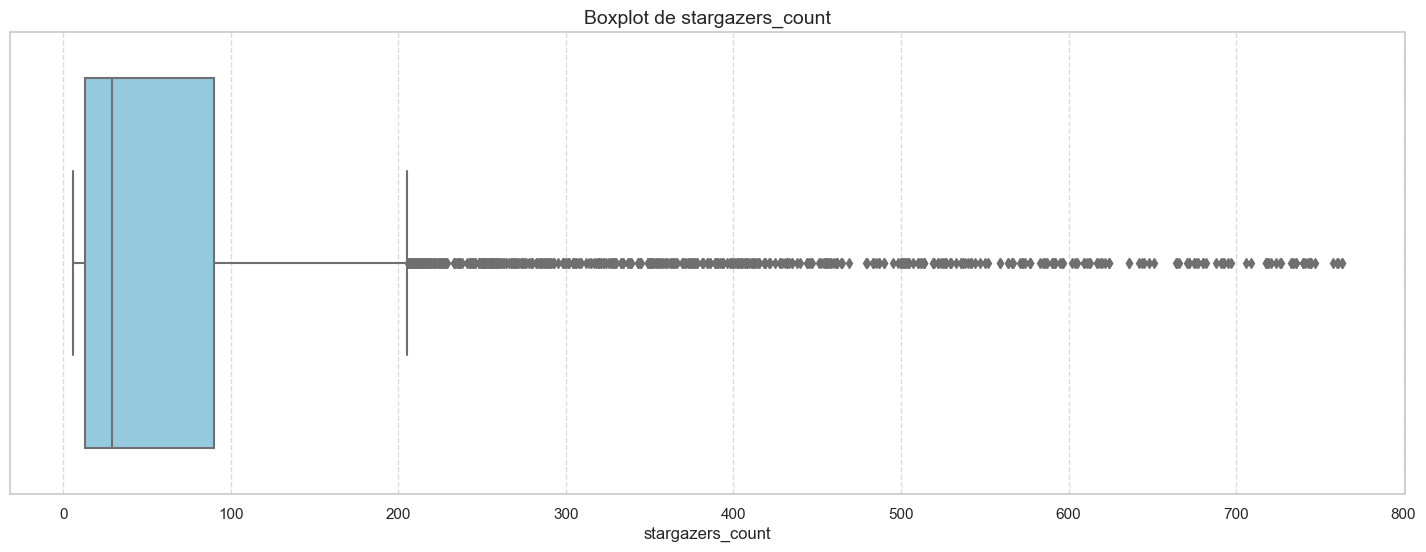

In [71]:
# Boxplot de df_teste

boxplot_generate(df_teste, "stargazers_count")

La distribución sigue siendo completamente asimétrica, pero ahora está más ajustada.

Las funciones *normalize_by_month* y *normalize_by_days* generan nuevas columnas `stargazers_rate` y `forks_rate` con los valores normalizados, sin descartar las columnas originales.

In [72]:
# Normalizando dataframes por meses

df_filtered = normalize_by_months(df_teste)

df = normalize_by_months(df)

df_outlier = normalize_by_months(df_outlier)

df_filtered.sample()

id       name                  full_name  \
28784  514849683  ActTensor  pouyaardehkhani/ActTensor   

                                                   owner  stargazers_count  \
28784  {'login': 'pouyaardehkhani', 'id': 77702723, '...                24   

       forks_count  watchers_count  open_issues_count  \
28784            4              24                  0   

                                                  topics          created_at  \
28784  [activation, activation-code, activation-funct... 2022-07-17 13:22:14   

       ...                            machine-learning_topics  \
28784  ...  [activation, activation-code, activation-funct...   

                                    deep-learning_topics  \
28784  [activation, activation-code, activation-funct...   

                                  computer-vision_topics  \
28784  [activation, activation-code, activation-funct...   

                            business-intelligence_topics  \
28784  [activation, activation-code, activation-funct...   

                                           deploy_topics  \
28784  [activation, activation-code, activation-funct...   

                                              nlp_topics  \
28784  [activation, activation-code, activation-funct...   

                                           health_topics  \
28784  [activation, activation-code, activation-funct...   

      months_since_creation stargazers_rate forks_rate  
28784                    29         4.38178   0.730297  

[1 rows x 31 columns]

### Resumen de los dataframes prueba

|   DataFrame         |    Descripción                                                                |
| --------------      |   -----------------                                                           |
|  `df`       |   df que incluye todos los datos ya tratados y normalizados, pero sin filtros de outliers              | 
|  `df_teste`           |   df que incluye outliers filtrados pero no normalizados temporalmente     | 
|  `df_filtered`   |   df listo para análisis, con filtros de outliers y normalizado temporalmente |
|  `df_outlier` |   df con solo valores outliers (> 1.5 IQR)       

## 4. Análisis finales y conclusiones.

La función top_20_strings_by_columns muestra gráficos de barras horizontales con los 20 temas con el mayor valor de suma de stargazers_count (o cualquier columna numérica).

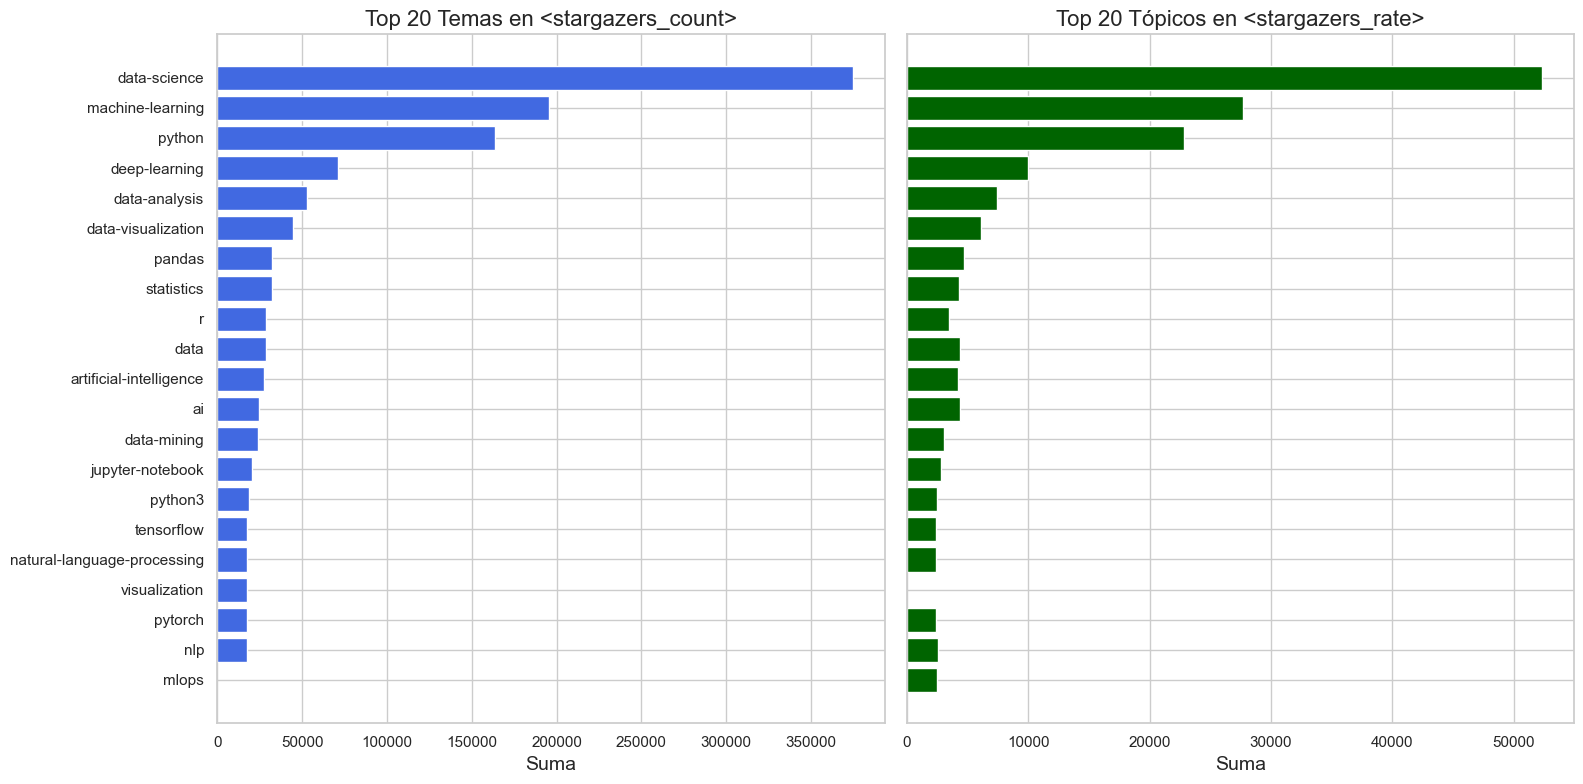

In [73]:
# df_filtered

top_20_strings_by_columns(df_filtered, "stargazers_count", "stargazers_rate", "topics")


Estos gráficos nos permiten visualizar los temas que cambiaron después de la normalización temporal de `df_filtered`. Los dos resultados parecen consistentes y similares. El único cambio significativo es la inclusión de *mlops* y la exclusión de *visualization* en los datos normalizados. Esto tiene sentido si se considera la lógica de la normalización temporal, muy probablemente porque *mlops* aparece en repositorios más recientes en comparación con *visualization*.

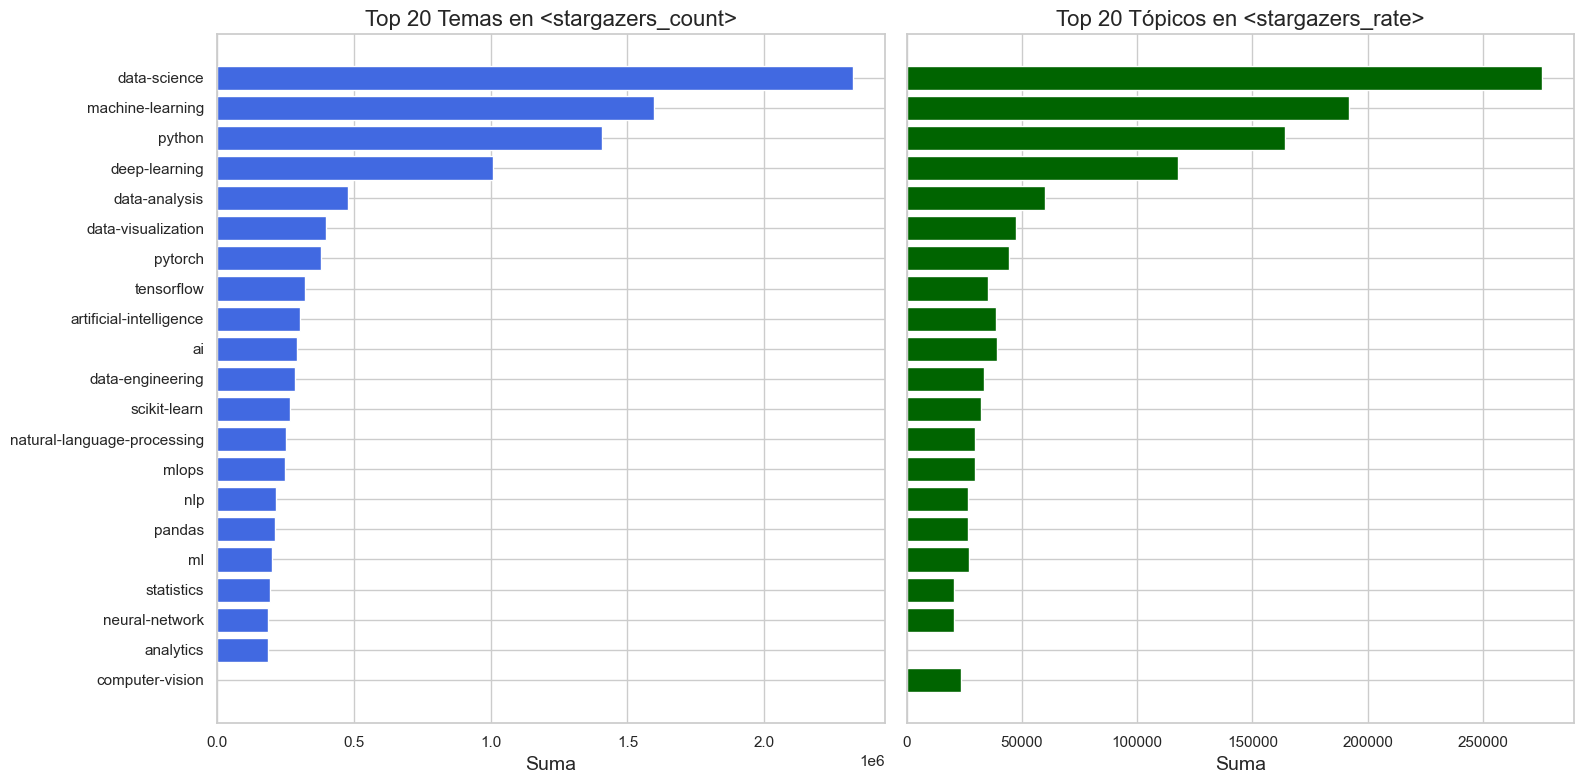

In [74]:
top_20_strings_by_columns(df_outlier, "stargazers_count", "stargazers_rate", "topics")

Este gráfico de `df_outlier` sirve únicamente para visualizar los tópico que aparecen en los mayores valores anómalos, los cuales distorsionarían significativamente la distribución de los datos en las pruebas de hipótesis. Un ejemplo claro de esto es *Computer-Vision*, tópico ausente en `df_filtered`, pero presente en `df_outlier`, lo que demuestra cuánto estos valores anómalos pueden sesgar y distorsionar los análisis. La presencia de cualquier tópico aquí tendrá un impacto en el df no filtrado, ya que más de la mitad de los valores de *stargazers_count* son cero, y el valor más bajo en el `df_outlier` es 766.

Los gráficos anteriores que muestran los 20 temas con mayores valores de popularidad y compromiso no nos dicen necesariamente si esos temas son determinantes en el éxito de esos repositorios a nivel poblacional, debido al motivo previamente discutido de los valores discrepantes, lo que hace que un tema pueda estar entre los 20 por pocas "apariciones fortuitas". Para analizar esto de otra manera, realizaremos pruebas de hipótesis con el fin de verificar si la popularidad y el compromiso del grupo de datos que posee un determinado tema es significativamente diferente del grupo que no lo posee.

### Pruebas de hipótesis

La función `analyse_topic_success` se utilizará para todas las pruebas de hipótesis siguientes

`analyze_topic_success(df, topics_column, search_string, numeric_columns, log_normalization=False, oversample=False)`

* Dado un DataFrame `<df>`, una columna que contiene tópicos `<topics_column>`, un tópico de interés `<search_string>` y un par de columnas numéricas `<numeric_columns>`, la función devuelve dos gráficos de barras con la suma total de los valores numéricos por cada grupo de muestra, es decir, un grupo con la presencia del tópico de interés y el otro sin. También se genera una estadística p basada en la prueba U de Mann-Whitney.

* La función también recibe dos argumentos predefinidos como False, que pueden y serán utilizados como True. Uno de ellos es `<log_normalization>` y el otro `<oversample>`.

* La normalización logarítmica es importante para suavizar la asimetría y discrepancia de datos como estos, que tienen muchos valores bajos y pocos valores extremadamente altos.

$$
\sum_{i=1}^{n} \log(1 + x_i)
$$

* La técnica de sobremuestreo se utiliza en casos donde un grupo de muestra tiene muchos menos representantes que otros, de manera que se compensa con imputación manteniendo el patrón y la distribución de los valores. Esto es importante porque las diferencias muy grandes en los tamaños de las muestras afectan los resultados de las pruebas de hipótesis como estas. También existen técnicas de submuestras y asignación de pesos a los datos, que se consideraron menos convenientes para este caso.

Número de repositorios con la etiqueta 'llm': 48
Número de repositorios sin la etiqueta 'llm': 4289
Número de repositorios con la etiqueta 'llm' (después de sobreamostrado): 4289

Para stargazers_rate:
Total 'con llm': 13270.502780561686
Total 'sin llm': 8138.5857686131085
Valor normalizado 'con llm': 3.0940785219309133
Valor normalizado 'sin llm': 1.8975485587813263

Para forks_rate:
Total 'con llm': 6430.778204748293
Total 'sin llm': 4874.056357837755
Valor normalizado 'con llm': 1.4993654009671935
Valor normalizado 'sin llm': 1.1364085702582782


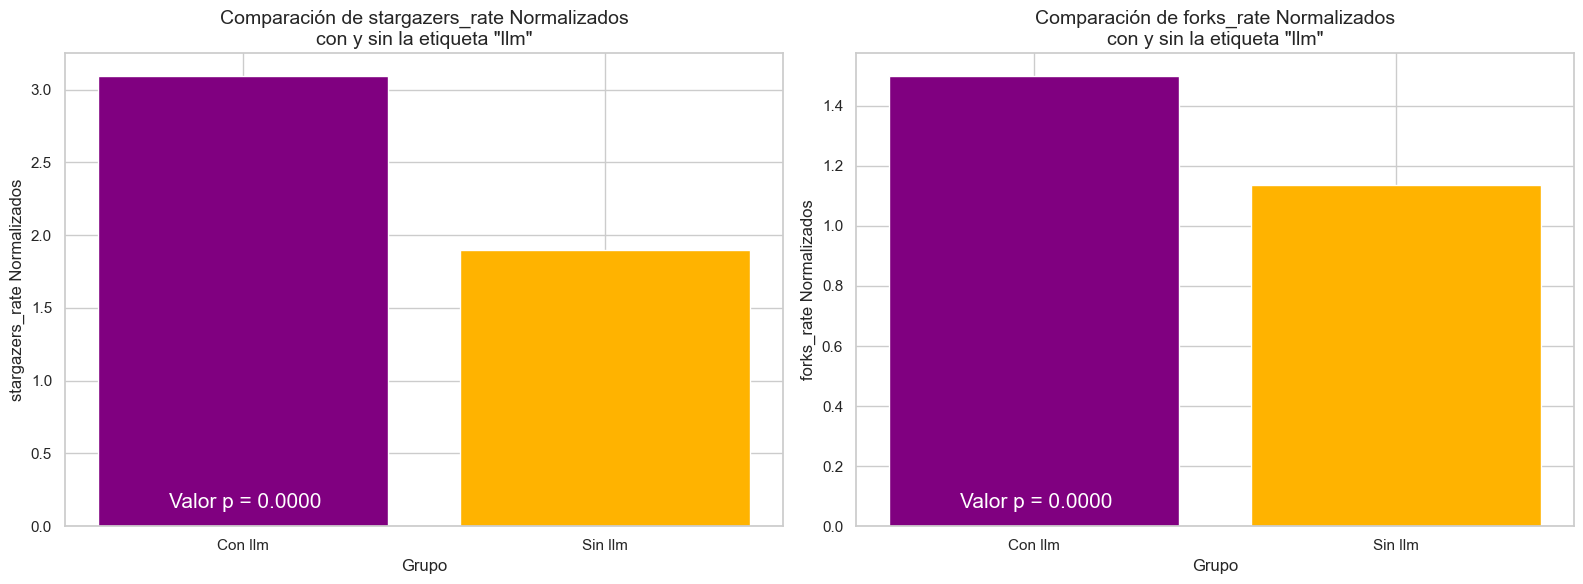

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [75]:
analyze_topic_success(df_filtered, "llm_topics", "llm", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'machine-learning': 2184
Número de repositorios sin la etiqueta 'machine-learning': 2153
Número de repositorios con la etiqueta 'machine-learning' (después de sobreamostrado): 2153

Para stargazers_rate:
Total 'con machine-learning': 4324.0420444492665
Total 'sin machine-learning': 3950.7245349462614
Valor normalizado 'con machine-learning': 2.0083799556197244
Valor normalizado 'sin machine-learning': 1.8349858499518168

Para forks_rate:
Total 'con machine-learning': 2613.7941323420546
Total 'sin machine-learning': 2316.2618052480643
Valor normalizado 'con machine-learning': 1.214024213814238
Valor normalizado 'sin machine-learning': 1.0758299141886039


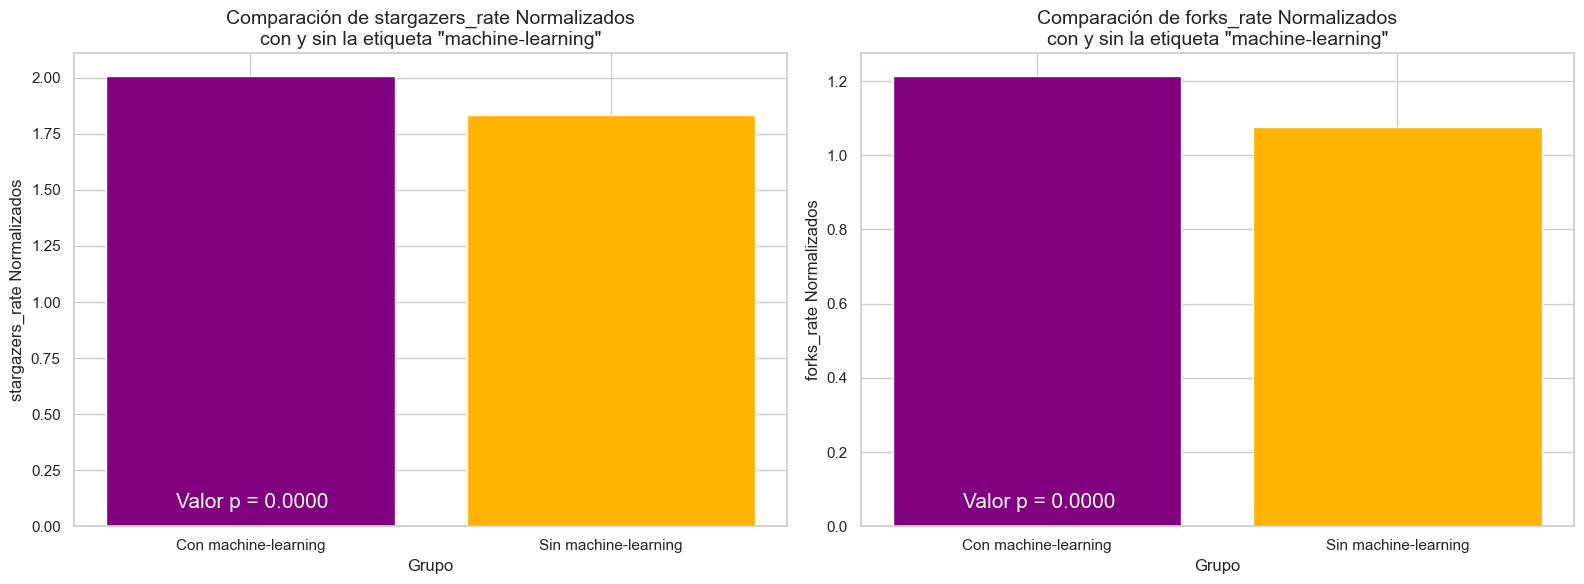

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [76]:
analyze_topic_success(df_filtered, "machine-learning_topics", "machine-learning", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'artificial-intelligence': 378
Número de repositorios sin la etiqueta 'artificial-intelligence': 3959
Número de repositorios con la etiqueta 'artificial-intelligence' (después de sobreamostrado): 3959

Para stargazers_rate:
Total 'con artificial-intelligence': 8592.901132640276
Total 'sin artificial-intelligence': 7462.766635921873
Valor normalizado 'con artificial-intelligence': 2.170472627592896
Valor normalizado 'sin artificial-intelligence': 1.8850130426678133

Para forks_rate:
Total 'con artificial-intelligence': 4925.740238137159
Total 'sin artificial-intelligence': 4473.620090381229
Valor normalizado 'con artificial-intelligence': 1.2441879863948369
Valor normalizado 'sin artificial-intelligence': 1.1299873933774258


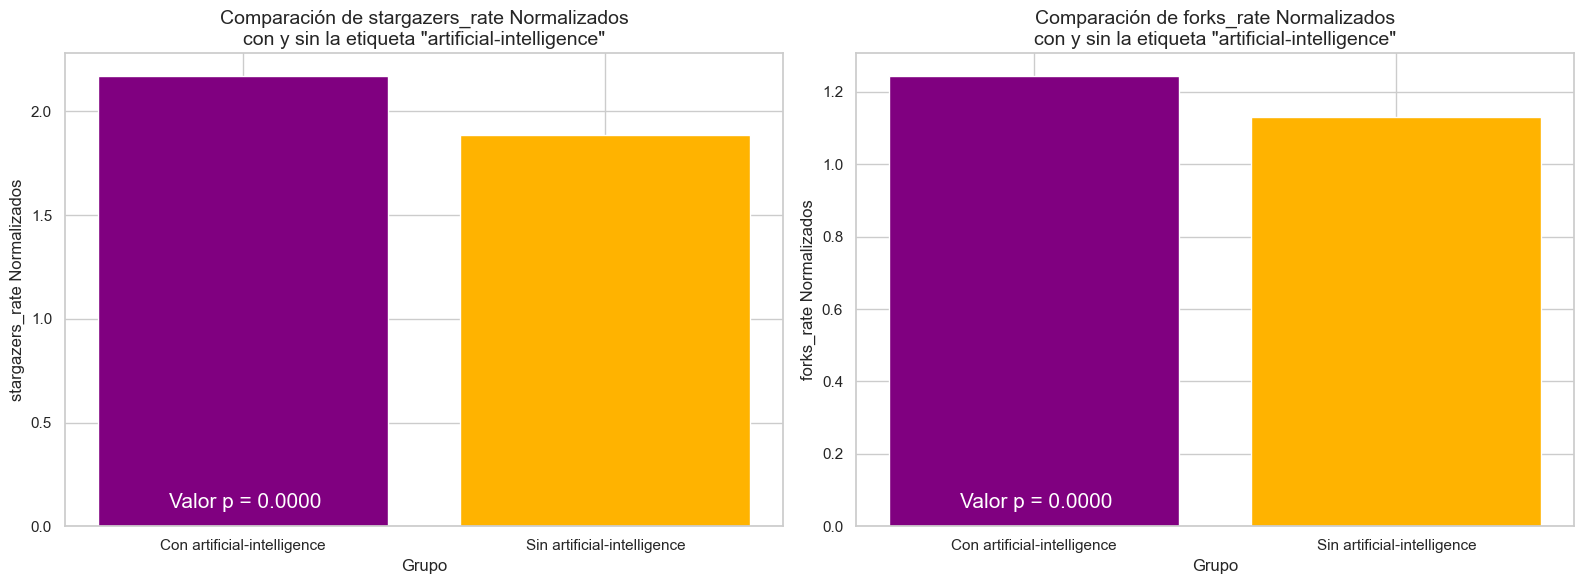

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [77]:
analyze_topic_success(df_filtered, "artificial-intelligence_topics", "artificial-intelligence", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'generative-ai': 27
Número de repositorios sin la etiqueta 'generative-ai': 4310
Número de repositorios con la etiqueta 'generative-ai' (después de sobreamostrado): 4310

Para stargazers_rate:
Total 'con generative-ai': 9719.209080359771
Total 'sin generative-ai': 8225.38018912047
Valor normalizado 'con generative-ai': 2.255036909596235
Valor normalizado 'sin generative-ai': 1.9084408791462806

Para forks_rate:
Total 'con generative-ai': 5513.789680604319
Total 'sin generative-ai': 4910.821579885058
Valor normalizado 'con generative-ai': 1.279301550024204
Valor normalizado 'sin generative-ai': 1.1394017586740273


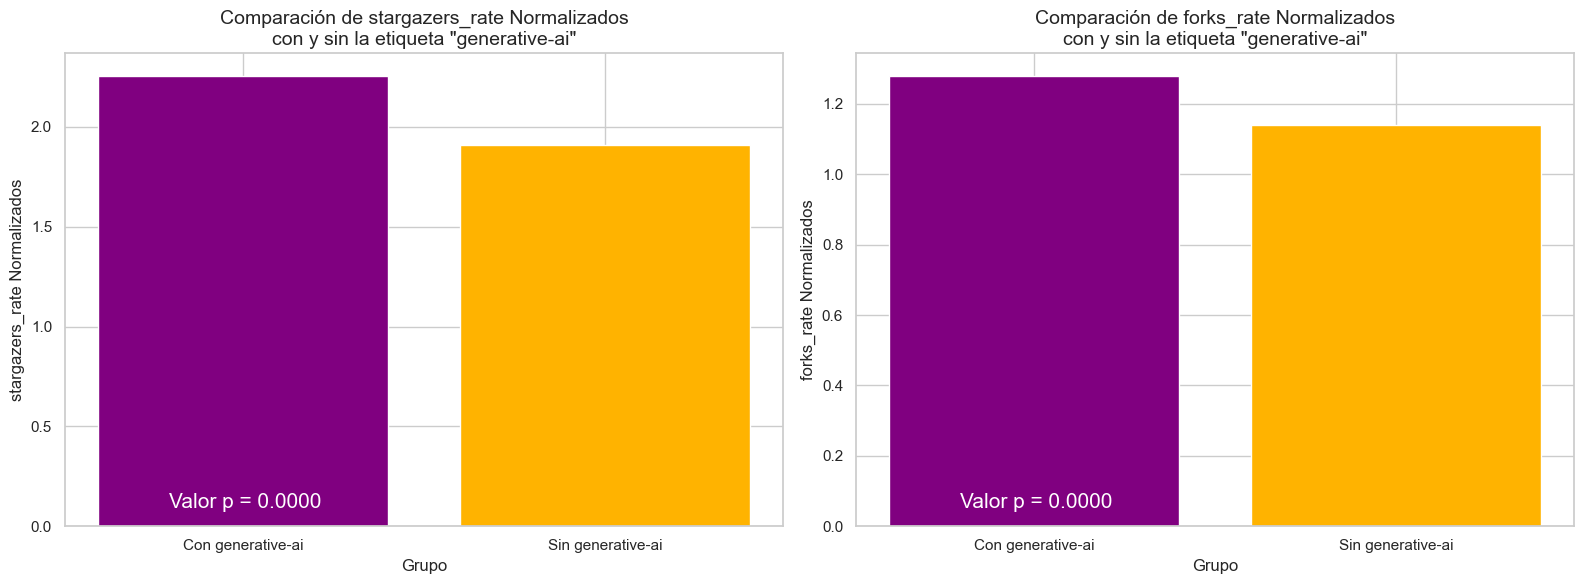

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [78]:
analyze_topic_success(df_filtered, "generative-ai_topics", "generative-ai", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'business-intelligence': 48
Número de repositorios sin la etiqueta 'business-intelligence': 4289
Número de repositorios con la etiqueta 'business-intelligence' (después de sobreamostrado): 4289

Para stargazers_rate:
Total 'con business-intelligence': 8128.195123477467
Total 'sin business-intelligence': 8196.110261113728
Valor normalizado 'con business-intelligence': 1.8951259322633405
Valor normalizado 'sin business-intelligence': 1.9109606577555907

Para forks_rate:
Total 'con business-intelligence': 4706.23997575748
Total 'sin business-intelligence': 4893.335871851846
Valor normalizado 'con business-intelligence': 1.0972814119276009
Valor normalizado 'sin business-intelligence': 1.1409036772795165


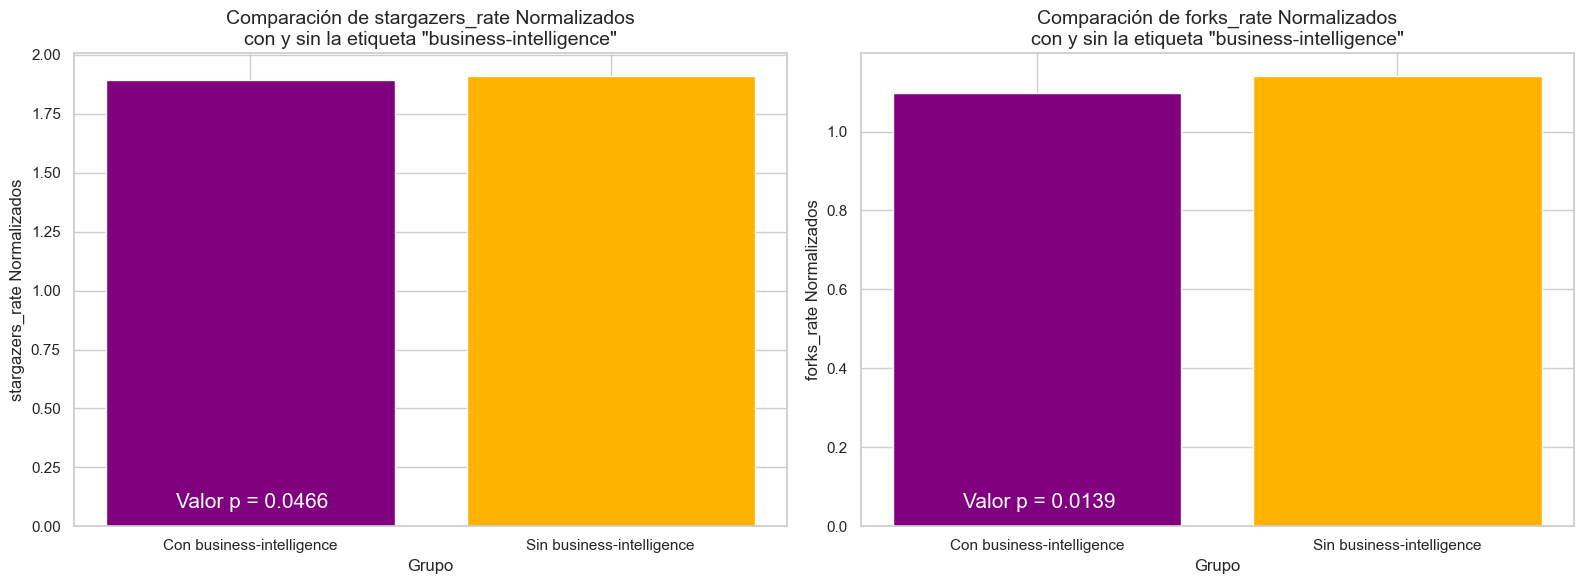

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0466
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0139
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [79]:
analyze_topic_success(df_filtered, "business-intelligence_topics", "business-intelligence", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'computer-vision': 127
Número de repositorios sin la etiqueta 'computer-vision': 4210
Número de repositorios con la etiqueta 'computer-vision' (después de sobreamostrado): 4210

Para stargazers_rate:
Total 'con computer-vision': 9558.54367045861
Total 'sin computer-vision': 8002.700512162427
Valor normalizado 'con computer-vision': 2.270437926474729
Valor normalizado 'sin computer-vision': 1.9008789815112652

Para forks_rate:
Total 'con computer-vision': 5640.653884391959
Total 'sin computer-vision': 4777.302418769331
Valor normalizado 'con computer-vision': 1.339822775390014
Valor normalizado 'sin computer-vision': 1.1347511683537603


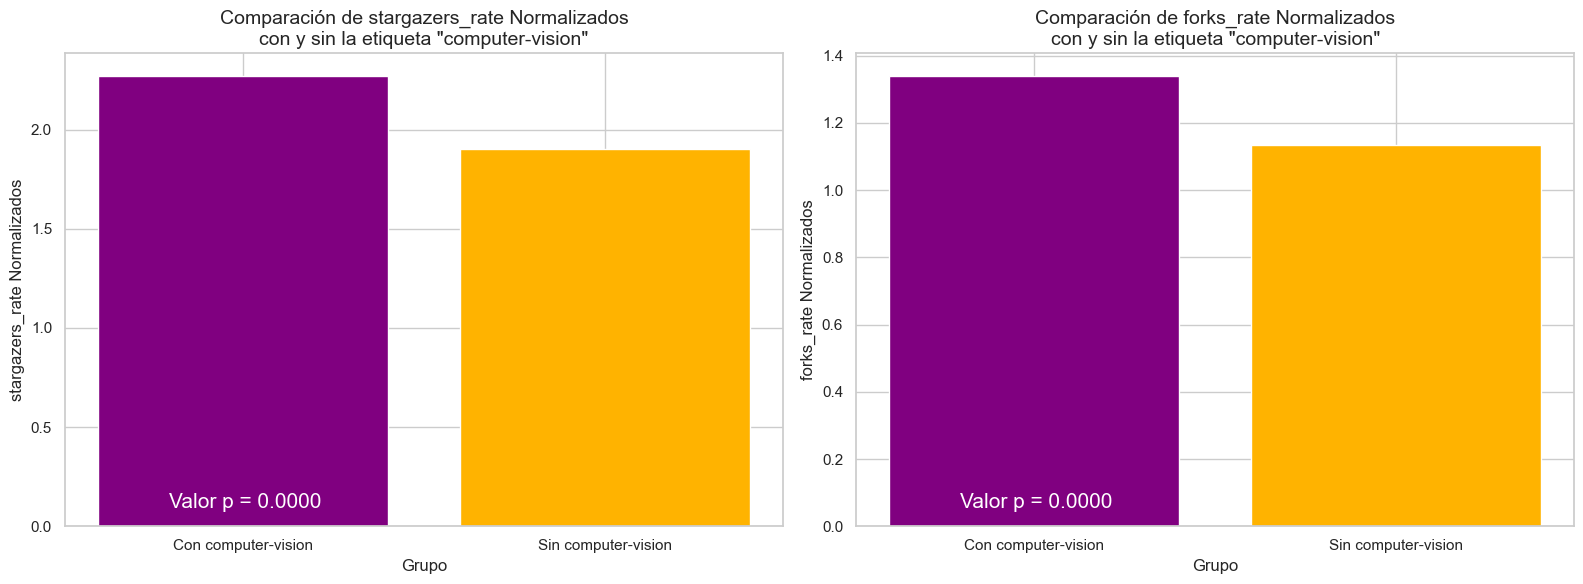

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [80]:
analyze_topic_success(df_filtered, "computer-vision_topics", "computer-vision", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'deep-learning': 632
Número de repositorios sin la etiqueta 'deep-learning': 3705
Número de repositorios con la etiqueta 'deep-learning' (después de sobreamostrado): 3705

Para stargazers_rate:
Total 'con deep-learning': 8130.5337945871515
Total 'sin deep-learning': 6900.6376334383585
Valor normalizado 'con deep-learning': 2.1944760579182594
Valor normalizado 'sin deep-learning': 1.8625202789307311

Para forks_rate:
Total 'con deep-learning': 4748.115126744585
Total 'sin deep-learning': 4137.5814913253
Valor normalizado 'con deep-learning': 1.2815425443305222
Valor normalizado 'sin deep-learning': 1.1167561380095277


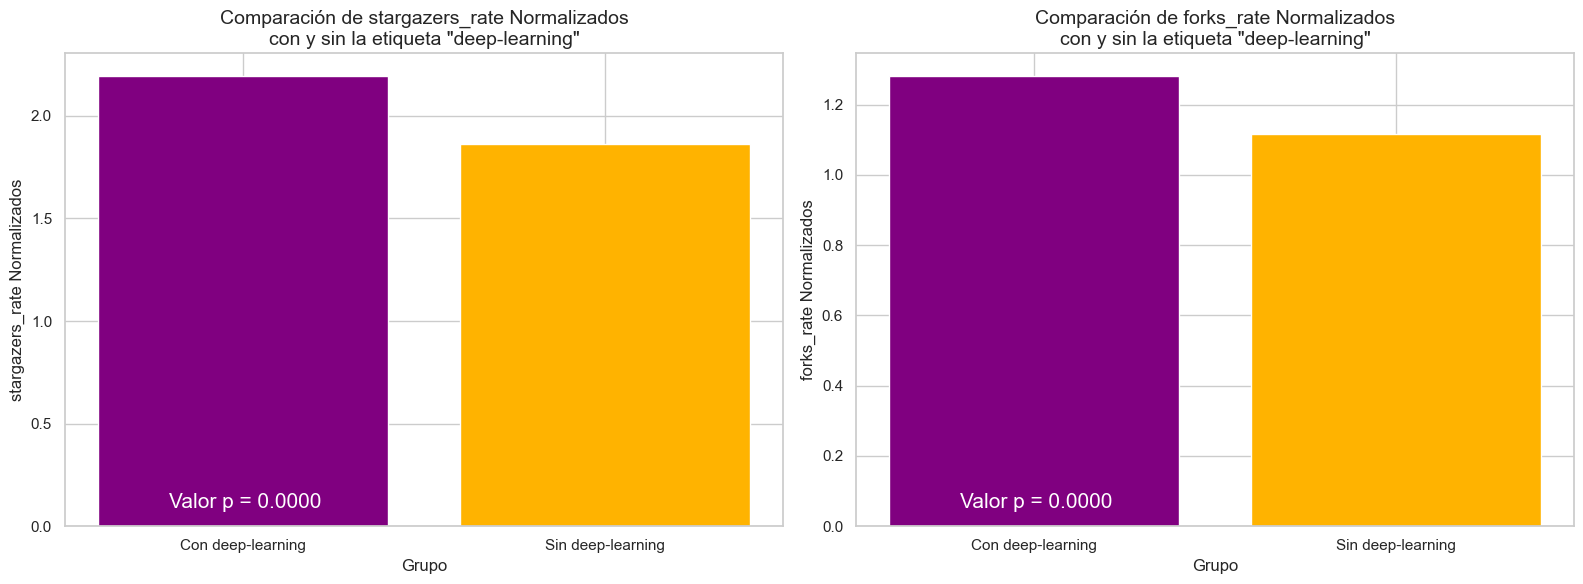

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [81]:
analyze_topic_success(df_filtered, "deep-learning_topics", "deep-learning", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'big-data': 88
Número de repositorios sin la etiqueta 'big-data': 4249
Número de repositorios con la etiqueta 'big-data' (después de sobreamostrado): 4249

Para stargazers_rate:
Total 'con big-data': 8230.512211561807
Total 'sin big-data': 8118.629439747263
Valor normalizado 'con big-data': 1.93704688434027
Valor normalizado 'sin big-data': 1.9107153306065576

Para forks_rate:
Total 'con big-data': 4924.520813099944
Total 'sin big-data': 4844.857721316805
Valor normalizado 'con big-data': 1.1589834815485864
Valor normalizado 'sin big-data': 1.1402348132070617


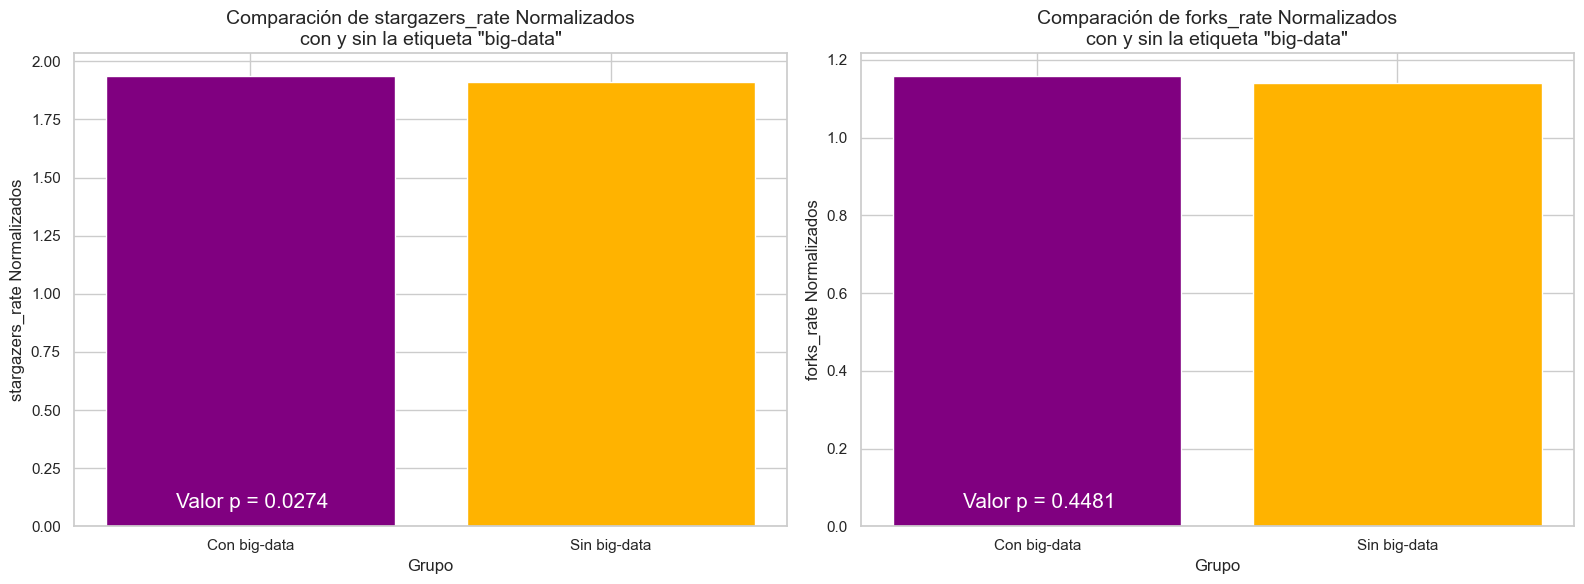

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0274
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.4481
No rechazamos la hipótesis nula para forks_rate: No existe una diferencia significativa.



In [82]:
analyze_topic_success(df_filtered, "big-data_topics", "big-data", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'deploy': 169
Número de repositorios sin la etiqueta 'deploy': 4168
Número de repositorios con la etiqueta 'deploy' (después de sobreamostrado): 4168

Para stargazers_rate:
Total 'con deploy': 9737.282949887696
Total 'sin deploy': 7884.590542160067
Valor normalizado 'con deploy': 2.336200323869409
Valor normalizado 'sin deploy': 1.8916963872744883

Para forks_rate:
Total 'con deploy': 5447.357968717704
Total 'sin deploy': 4721.332824195642
Valor normalizado 'con deploy': 1.306947689231695
Valor normalizado 'sin deploy': 1.1327573954404133


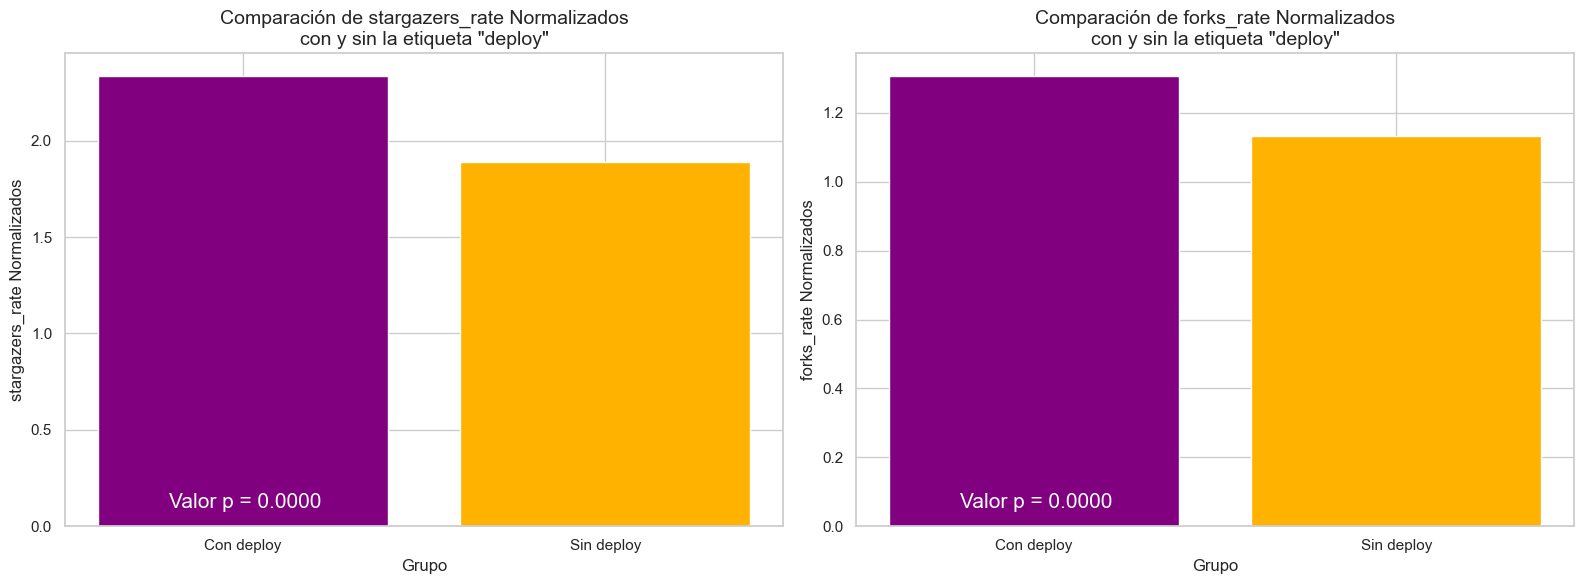

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [83]:
analyze_topic_success(df_filtered, "deploy_topics", "deploy", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'nlp': 279
Número de repositorios sin la etiqueta 'nlp': 4058
Número de repositorios con la etiqueta 'nlp' (después de sobreamostrado): 4058

Para stargazers_rate:
Total 'con nlp': 8370.480020871868
Total 'sin nlp': 7709.308022183133
Valor normalizado 'con nlp': 2.0627107000669955
Valor normalizado 'sin nlp': 1.8997801927508953

Para forks_rate:
Total 'con nlp': 4831.587971391523
Total 'sin nlp': 4616.793474331142
Valor normalizado 'con nlp': 1.190632817001361
Valor normalizado 'sin nlp': 1.1377016940195026


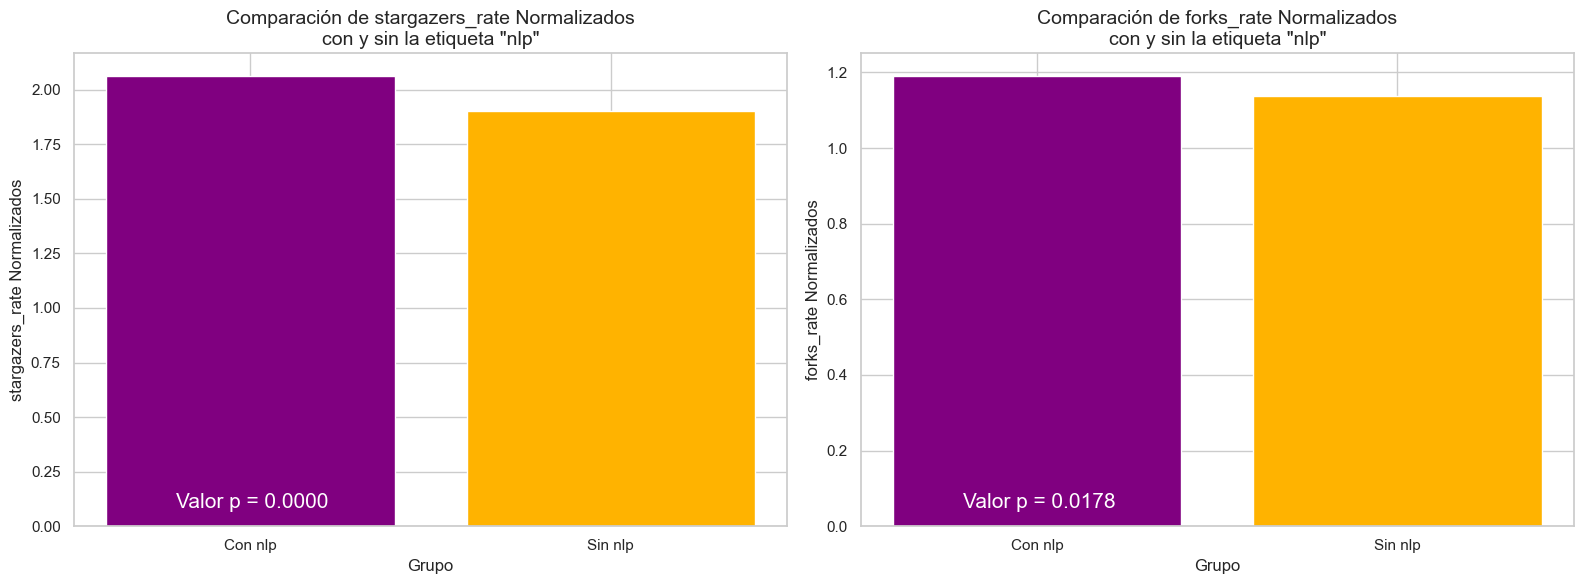

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0178
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [84]:
analyze_topic_success(df_filtered, "nlp_topics", "nlp", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'data-visualization': 531
Número de repositorios sin la etiqueta 'data-visualization': 3806
Número de repositorios con la etiqueta 'data-visualization' (después de sobreamostrado): 3806

Para stargazers_rate:
Total 'con data-visualization': 7060.685191851904
Total 'sin data-visualization': 7298.69983162294
Valor normalizado 'con data-visualization': 1.8551458727934589
Valor normalizado 'sin data-visualization': 1.91768256217103

Para forks_rate:
Total 'con data-visualization': 4351.187388245682
Total 'sin data-visualization': 4341.978923460332
Valor normalizado 'con data-visualization': 1.1432441902905102
Valor normalizado 'sin data-visualization': 1.1408247302838497


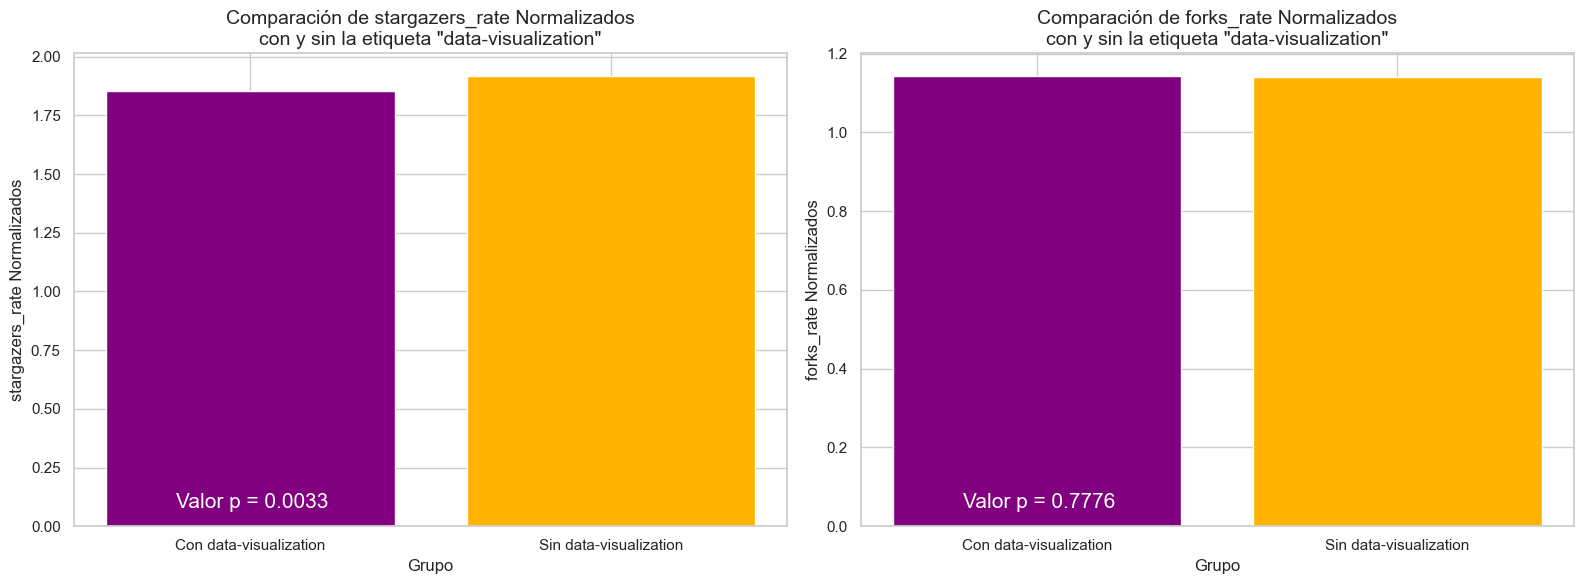

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0033
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.7776
No rechazamos la hipótesis nula para forks_rate: No existe una diferencia significativa.



In [85]:
analyze_topic_success(df_filtered, "topics", "data-visualization", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'health': 58
Número de repositorios sin la etiqueta 'health': 4279
Número de repositorios con la etiqueta 'health' (después de sobreamostrado): 4279

Para stargazers_rate:
Total 'con health': 7991.3761492812755
Total 'sin health': 8179.145407061995
Valor normalizado 'con health': 1.8675803106523197
Valor normalizado 'sin health': 1.911461885268052

Para forks_rate:
Total 'con health': 4639.894976229106
Total 'sin health': 4882.254292259355
Valor normalizado 'con health': 1.0843409619605295
Valor normalizado 'sin health': 1.1409802038465424


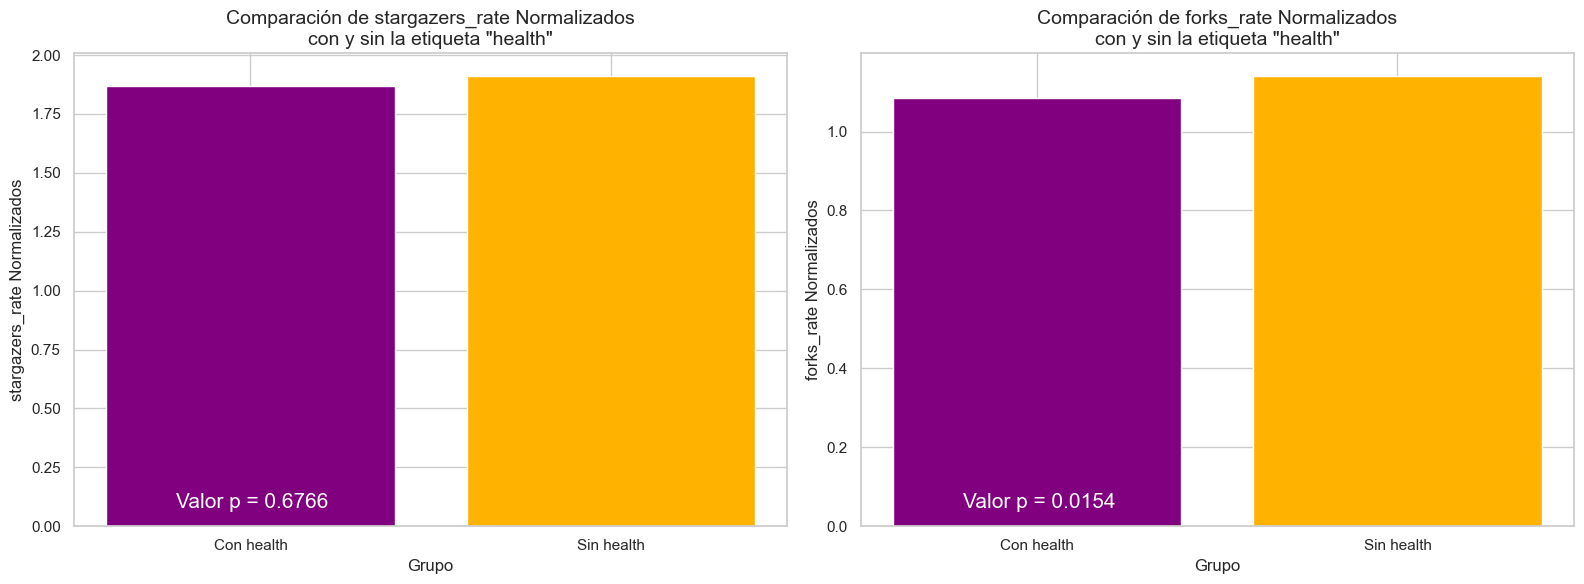

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.6766
No rechazamos la hipótesis nula para stargazers_rate: No existe una diferencia significativa.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0154
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [86]:
analyze_topic_success(df_filtered, "health_topics", "health", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)



## Resumen

##### La popularidad y el compromiso público en los repositorios de GitHub parecen estar influenciados por determinados temas (tópicos). Temas como *Large-Language Modeling*, *Machine-Learning* y *Generative-AI* son ejemplos de tópicos que están aumentando no solo en el número de apariciones en los últimos años, sino también siendo determinantes en los índices de popularidad y compromiso activo establecidos. Otras áreas, como *Business Intelligence* y *Data-Visualization*, a pesar de estar aumentando considerablemente en apariciones en los repositorios de GitHub, parecen no ser decisivas en el aumento de popularidad/compromiso del repositorio. Por otro lado, otras como *Health*, relacionadas con la utilización de data science en el sector de la medicina y Salud, aunque están aumentando su número de repositorios, muestran una relación negativa con el compromiso, perjudicándolo (posiblemente porque es un área específica que no todos los científicos de datos pueden aplicar).

## Próximos pasos

* A pesar de que los datos obtenidos a través de la API están muy bien organizados, se requieren muchas manipulaciones, especialmente en la columna de topics. Esta variable contiene elementos de diferentes naturalezas, es decir, incluye lenguajes de programación, técnicas, software, subáreas del conocimiento, etc. Esto puede diluir los datos de interés y desviar los objetivos. Lo ideal sería crear etiquetas para estos elementos, además de intentar unificar aquellos que poseen el mismo valor analítico, como todas las variaciones de la escritura de "machine-learning" (parcialmente realizado por la función plot_string_with_normalization).

* uscar nuevas formas de normalizar las variables, como por ejemplo mediante el número de ocurrencias de sí misma, evitando favorecer los tópicos que aparecen más frecuentemente y que naturalmente tienden a tener mayores valores de stargazers_count y forks_count.

* Realizar análisis involucrando los títulos (nombres) de los repositorios, de manera similar a los topics, pero buscando términos o palabras específicas que no aparecen en los tópicos y que puedan ser indicativos de alguna tendencia.

* Obtener datos de los usuarios de cada repositorio para analizar sesgos, como el impacto general del autor del repositorio (o la empresa responsable, etc.) en los datos que son outliers. Muchos de estos outliers extremos pueden derivarse únicamente de la fama del creador del repositorio, sin estar relacionados con el contenido o el tema específicamente.